In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdatuneq

In [4]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=0.5 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= math.pi/6. #math.pi/6. #math.pi/6.
mass0_1=2.0
mass0_2=3.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 0.5235987755982988
0.5
(array([3.66519143, 0.52359878]), 0.5235987755982988, 50, 0.5, array([2., 3.]))


In [5]:
import getxyuvtwouneq_apper #unequal mass version

In [6]:
useperihelion=True

In [7]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 50 [3.66519143 0.52359878] 0.5 [-0.8660254  0.8660254] [-0.5  0.5]
coordsep 50
[-43.30127019  43.30127019]
[-25.  25.]
ellipse
(array([2., 3.]), array([[-12.99038106,  -7.5       ,   0.        ,   0.16431677,
         -0.28460499,   0.        ],
       [  8.66025404,   5.        ,   0.        ,  -0.10954451,
          0.18973666,   0.        ]]), array([[ 0.00415692,  0.0024    ,  0.        ],
       [-0.00277128, -0.0016    ,  0.        ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[2. 3.] [[-12.99038106  -7.5          0.           0.16431677  -0.28460499
    0.        ]
 [  8.66025404   5.           0.          -0.10954451   0.18973666
    0.        ]] 0.0
[2. 3.] [[-12.99038106  -7.5          0.           0.16431677  -0.28460499
    0.        ]
 [  8.66025404   5.           0.          -0.10954451   0.18973666
    0.        ]] 0.0


In [12]:
print(xyuvaequneq)

(array([2., 3.]), array([[-12.99038106,  -7.5       ,   0.        ,   0.16431677,
         -0.28460499,   0.        ],
       [  8.66025404,   5.        ,   0.        ,  -0.10954451,
          0.18973666,   0.        ]]), array([[ 0.00415692,  0.0024    ,  0.        ],
       [-0.00277128, -0.0016    ,  0.        ]]))


In [13]:
import timestepAdaptive

In [14]:
import parabfns

In [15]:
import ellipsefns

In [16]:
import hyperbfns

In [17]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[-0.00164379  0.00284569  0.        ]
[2.70204934e-06 8.09795037e-06 0.00000000e+00]
1.0799999712000482e-05
0.003286335301213265
45.643547067343455 False
0.023393077316699557
[-0.00384826  0.00665525  0.        ]
[1.48090913e-05 4.42923902e-05 0.00000000e+00]
5.910148148598719e-05
0.007687748791810721
19.5115636660482 False
0.044248941326848146
[-0.00728918  0.01258285  0.        ]
[5.31321769e-05 1.58328219e-04 0.00000000e+00]
0.00021146039577663023
0.014541677887253253
10.315178287058949 False
0.071369816248636
[-0.01178199  0.02028046  0.        ]
[0.00013882 0.0004113  0.        ]
0.0005501121960897455
0.02345447070581098
6.395369219005084 False
0.10214650077509274
[-0.01691247  0.02899688  0.        ]
[0.00028603 0.00084082 0.        ]
0.0011268507302252821
0.03356859738245377
4.468461946473958 False
0.1336612502145415
[-0.022213    0.03789453  0.        ]
[0.00049342 0.001436   0.        ]
0.0019294127189808455
0.04392508075098833
3.414905503540251 False
0.16352821683607252


0.31470512728161326
[-0.08177586  0.0541171   0.        ]
[0.00668729 0.00292866 0.        ]
0.009615952312247926
0.09806096222375103
1.5296606987981296 False
0.31498879514064526
[-0.08199148  0.05378499  0.        ]
[0.0067226  0.00289283 0.        ]
0.009615428211535071
0.09805828986646194
1.5297023862467263 False
0.31527486668084215
[-0.08220548  0.05345247  0.        ]
[0.00675774 0.00285717 0.        ]
0.009614907313126097
0.09805563376535842
1.5297438223584532 False
0.3155633349647135
[-0.08241786  0.05311954  0.        ]
[0.0067927  0.00282169 0.        ]
0.009614389621486814
0.09805299394453397
1.5297850067163792 False
0.31585419304111984
[-0.08262864  0.05278621  0.        ]
[0.00682749 0.00278638 0.        ]
0.009613875140646917
0.09805037042585263
1.5298259389385231 False
0.3161474339462053
[-0.08283779  0.05245249  0.        ]
[0.0068621  0.00275126 0.        ]
0.00961336387420551
0.09804776322897688
1.5298666186774288 False
0.31644305070431833
[-0.08304534  0.05211839  0. 

1.5329668180083489 False
0.3645191688889203
[-0.09694024  0.01330111  0.        ]
[0.00939741 0.00017692 0.        ]
0.00957432929047164
0.09784850172829239
1.5329820830218013 False
0.36504562728355483
[-0.09698361  0.01297381  0.        ]
[0.00940582 0.00016832 0.        ]
0.009574140575793727
0.09784753740280706
1.5329971911556435 False
0.3655737467302828
[-0.09702583  0.01264685  0.        ]
[0.00941401 0.00015994 0.        ]
0.00957395381115595
0.09784658303260237
1.5330121436128248 False
0.3661035229331691
[-0.09706689  0.01232023  0.        ]
[0.00942198 0.00015179 0.        ]
0.009573768981398806
0.0978456385405032
1.5330269415933906 False
0.3666349516338558
[-0.0971068   0.01199395  0.        ]
[0.00942973 0.00014385 0.        ]
0.009573586071405358
0.09784470384954598
1.5330415862942595 False
0.36716802861154846
[-0.09714557  0.01166802  0.        ]
[0.00943726 0.00013614 0.        ]
0.009573405066101376
0.09784377888297946
1.5330560789092074 False
0.3677027496830051
[-0.09718

0.4400537513859615
[-0.09485867 -0.02374069  0.        ]
[0.00899817 0.00056362 0.        ]
0.009561788302220665
0.09778439702846597
1.5339870629496601 False
0.4407615090576771
[-0.09478841 -0.02401881  0.        ]
[0.00898484 0.0005769  0.        ]
0.009561745455265015
0.09778417793930169
1.533990499905932 False
0.44147065232956817
[-0.09471738 -0.02429652  0.        ]
[0.00897138 0.00059032 0.        ]
0.00956170323124025
0.09778396203488715
1.5339938869165817 False
0.4421811806261813
[-0.0946456  -0.02457381  0.        ]
[0.00895779 0.00060387 0.        ]
0.009561661624048626
0.09778374928406369
1.533997224469754 False
0.44289309339133986
[-0.09457306 -0.02485069  0.        ]
[0.00894406 0.00061756 0.        ]
0.009561620627664705
0.09778353965604183
1.5340005130478196 False
0.44360639008791536
[-0.09449977 -0.02512716  0.        ]
[0.00893021 0.00063137 0.        ]
0.00956158023613657
0.09778333312040743
1.5340037531272792 False
0.44432107019758904
[-0.09442573 -0.0254032   0.     

0.531347834742543
[-0.08196195 -0.05331173  0.        ]
[0.00671776 0.00284214 0.        ]
0.009559902837488629
0.09777475562479626
1.5341383268255298 False
0.5322155440872701
[-0.08181071 -0.0535436   0.        ]
[0.00669299 0.00286692 0.        ]
0.009559908102617459
0.097774782549579
1.5341379043613723 False
0.5330846337316693
[-0.08165878 -0.05377507  0.        ]
[0.00666816 0.00289176 0.        ]
0.009559913706428622
0.09777481120630518
1.5341374547223567 False
0.5339551034454053
[-0.08150617 -0.05400614  0.        ]
[0.00664326 0.00291666 0.        ]
0.009559919649859477
0.09777484159976674
1.5341369778333434 False
0.5348269529793483
[-0.08135289 -0.05423683  0.        ]
[0.00661829 0.00294163 0.        ]
0.009559925933902638
0.09777487373503807
1.5341364736147627 False
0.535700182065076
[-0.08119892 -0.05446712  0.        ]
[0.00659327 0.00296667 0.        ]
0.00955993255960879
0.09777490761749044
1.5341359419823914 False
0.5365747904143532
[-0.08104428 -0.05469702  0.        ]


0.6480597258403458
[-0.05805544 -0.07869867  0.        ]
[0.00337043 0.00619348 0.        ]
0.009563914477689582
0.09779526817637745
1.5338165414043279 False
0.6490839889350966
[-0.05781468 -0.07887616  0.        ]
[0.00334254 0.00622145 0.        ]
0.009563986767654145
0.0977956377741571
1.5338107446714573 False
0.6501092566462822
[-0.05757313 -0.07905311  0.        ]
[0.00331467 0.00624939 0.        ]
0.0095640599822736
0.09779601209800735
1.533804873860049 False
0.6511355207574957
[-0.05733078 -0.07922952  0.        ]
[0.00328682 0.00627732 0.        ]
0.009564134130772435
0.0977963911950356
1.5337989282329918 False
0.6521627729208523
[-0.05708762 -0.07940537  0.        ]
[0.003259   0.00630521 0.        ]
0.009564209222454774
0.09779677511275499
1.533792907046855 False
0.653191004655572
[-0.05684366 -0.07958067  0.        ]
[0.0032312  0.00633308 0.        ]
0.009564285266707401
0.09779716389909986
1.5337868095516483 False
0.6542202073465296
[-0.0565989  -0.07975542  0.        ]
[0

0.7713454678264045
[-0.02419097 -0.09484953  0.        ]
[0.0005852  0.00899643 0.        ]
0.009581635827121127
0.09788583057379208
1.5323974789887613 False
0.7723858318161376
[-0.02385093 -0.09493699  0.        ]
[0.00056887 0.00901303 0.        ]
0.009581898912954212
0.09788717440479223
1.5323764416746357 False
0.7734249445246643
[-0.02351005 -0.09502338  0.        ]
[0.00055272 0.00902944 0.        ]
0.00958216448294778
0.0978885309060657
1.53235520659658 False
0.7744627721068056
[-0.02316834 -0.09510868  0.        ]
[0.00053677 0.00904566 0.        ]
0.009582432552375082
0.09788990015509813
1.5323337725581279 False
0.7754992804321221
[-0.02282579 -0.09519289  0.        ]
[0.00052102 0.00906169 0.        ]
0.009582703136463156
0.09789128222912986
1.5323121383669438 False
0.7765344350849491
[-0.02248241 -0.09527601  0.        ]
[0.00050546 0.00907752 0.        ]
0.009582976250389976
0.09789267720514122
1.5322903028350536 False
0.7775682013644832
[-0.02213819 -0.09535802  0.        ]

[ 0.02185076 -0.09569347  0.        ]
[0.00047746 0.00915724 0.        ]
0.009634696295153835
0.09815648880819768
1.5281720222603616 False
0.8768383376648694
[ 0.02225568 -0.09560338  0.        ]
[0.00049532 0.00914001 0.        ]
0.009635321795859162
0.09815967499874458
1.528122418925271 False
0.8774079725599816
[ 0.02266061 -0.0955115   0.        ]
[0.0005135  0.00912245 0.        ]
0.009635950049817984
0.09816287510977856
1.5280726021140925 False
0.8779708219054558
[ 0.02306554 -0.09541783  0.        ]
[0.00053202 0.00910456 0.        ]
0.009636581035186878
0.09816608902868076
1.5280225736218862 False
0.8785268415113257
[ 0.02347045 -0.09532236  0.        ]
[0.00055086 0.00908635 0.        ]
0.009637214729611631
0.09816931664023965
1.5279723352837817 False
0.87907598752957
[ 0.02387532 -0.0952251   0.        ]
[0.00057003 0.00906782 0.        ]
0.009637851110227998
0.0981725578266554
1.5279218889748905 False
0.879618216463628
[ 0.02428015 -0.09512604  0.        ]
[0.00058953 0.00904

0.8886993306057893
[ 0.06711848 -0.07221968  0.        ]
[0.00450489 0.00521568 0.        ]
0.009720572766459098
0.09859296509619284
1.521406723630348 False
0.888298022484355
[ 0.06743059 -0.07193318  0.        ]
[0.00454688 0.00517438 0.        ]
0.009721266606351593
0.09859648374233025
1.5213524286728772 False
0.8878889738054117
[ 0.06774124 -0.07164553  0.        ]
[0.00458888 0.00513308 0.        ]
0.0097219584704425
0.09859999224362292
1.5212982941152455 False
0.88747221854105
[ 0.06805045 -0.07135674  0.        ]
[0.00463086 0.00509178 0.        ]
0.009722648323683183
0.09860349042342864
1.521244322648839 False
0.8870477912157583
[ 0.0683582  -0.07106682  0.        ]
[0.00467284 0.00505049 0.        ]
0.00972333613145138
0.09860697810728904
1.5211905169306874 False
0.8866157268980164
[ 0.06866448 -0.07077578  0.        ]
[0.00471481 0.00500921 0.        ]
0.009724021859564787
0.09861045512299792
1.521136879582427 False
0.8861760611917032
[ 0.06896929 -0.07048363  0.        ]
[0.0

0.7956064403197712
[ 0.09355497 -0.03212451  0.        ]
[0.00875253 0.00103198 0.        ]
0.009784516058224243
0.09891671273462459
1.5164272634334555 False
0.7945956723960704
[ 0.0936747  -0.03177893  0.        ]
[0.00877495 0.0010099  0.        ]
0.009784850511311834
0.09891840329944593
1.516401346935613 False
0.7935827978718015
[ 0.09379297 -0.03143343  0.        ]
[0.00879712 0.00098806 0.        ]
0.009785182080585453
0.09892007925889189
1.5163756552137675 False
0.7925678573952452
[ 0.09390978 -0.03108801  0.        ]
[0.00881905 0.00096646 0.        ]
0.00978551077927187
0.09892174068055955
1.516350187208933 False
0.7915508913398804
[ 0.09402512 -0.03074269  0.        ]
[0.00884072 0.00094511 0.        ]
0.009785836620739292
0.09892338763274988
1.5163249418516733 False
0.7905319398029209
[ 0.09413901 -0.03039747  0.        ]
[0.00886215 0.00092401 0.        ]
0.009786159618492784
0.09892502018444466
1.5162999180624535 False
0.789511042603931
[ 0.09425145 -0.03005234  0.        ]

0.6662750324793906
[0.09870117 0.00815662 0.        ]
[9.74192096e-03 6.65305162e-05 0.00000000e+00]
0.009808451477407889
0.09903762657398393
1.51457587574502 False
0.6652253754962313
[0.09867573 0.00846426 0.        ]
[9.73690049e-03 7.16436533e-05 0.00000000e+00]
0.00980854414553261
0.09903809441589943
1.5145687211033334 False
0.6641765877828563
[0.09864936 0.00877147 0.        ]
[9.73169708e-03 7.69385997e-05 0.00000000e+00]
0.009808635680274303
0.09903855653367684
1.514561654066458 False
0.6631286800294196
[0.09862206 0.00907825 0.        ]
[9.72631153e-03 8.24145630e-05 0.00000000e+00]
0.009808726092608546
0.09903901298280667
1.5145546737833528 False
0.6620816627678396
[0.09859384 0.0093846  0.        ]
[9.72074464e-03 8.80707509e-05 0.00000000e+00]
0.009808815393426764
0.09903946381835255
1.514547779409567 False
0.6610355463733794
[0.09856469 0.00969053 0.        ]
[9.71499722e-03 9.39063717e-05 0.00000000e+00]
0.009808903593533015
0.09903990909493514
1.514540970107483 False
0.65

1.5141543689256785 False
0.5448989839062491
[0.08922263 0.04304935 0.        ]
[0.00796068 0.00185325 0.        ]
0.009813924005840484
0.0990652512531033
1.5141535311585972 False
0.5440026132279276
[0.08909908 0.04330461 0.        ]
[0.00793865 0.00187529 0.        ]
0.009813934485667046
0.09906530414664383
1.514152722712675 False
0.5431076446040194
[0.08897482 0.04355945 0.        ]
[0.00791652 0.00189743 0.        ]
0.009813944587187571
0.09906535513078006
1.5141519434516648 False
0.5422140785793771
[0.08884986 0.04381389 0.        ]
[0.0078943  0.00191966 0.        ]
0.00981395431210426
0.09906540421410626
1.5141511932441194 False
0.5413219156727552
[0.08872419 0.04406793 0.        ]
[0.00787198 0.00194198 0.        ]
0.0098139636620585
0.09906545140490958
1.514150471963288 False
0.540431156377389
[0.08859781 0.04432155 0.        ]
[0.00784957 0.0019644  0.        ]
0.009813972638628073
0.09906549671115607
1.5141497794873322 False
0.5395418011615888
[0.08847073 0.04457477 0.        

0.4459250390058688
[0.06891595 0.07115453 0.        ]
[0.00474941 0.00506297 0.        ]
0.00981237504828791
0.09905743307944088
1.514273036731174 False
0.44520026661761924
[0.0687046  0.07135834 0.        ]
[0.00472032 0.00509201 0.        ]
0.009812333774176334
0.09905722474497422
1.5142762215091274 False
0.44447690592150624
[0.06849248 0.07156167 0.        ]
[0.00469122 0.00512107 0.        ]
0.009812291869345895
0.09905701322645406
1.5142794549749372 False
0.44375495743022286
[0.06827959 0.07176452 0.        ]
[0.0046621  0.00515015 0.        ]
0.009812249327590408
0.09905679849253361
1.5142827376084258 False
0.44303442167555224
[0.06806593 0.0719669  0.        ]
[0.00463297 0.00517924 0.        ]
0.009812206142625048
0.09905658051146854
1.5142860698955114 False
0.44231529920862206
[0.0678515 0.0721688 0.       ]
[0.00460383 0.00520834 0.        ]
0.009812162308089971
0.09905635925113526
1.5142894523279269 False
0.4415975906001363
[0.0676363  0.07237022 0.        ]
[0.00457467 0.00

0.3682871696803606
[0.03709116 0.09178445 0.        ]
[0.00137575 0.00842439 0.        ]
0.009800139711802732
0.09899565501476684
1.5152180161606588 False
0.3677459343702015
[0.03677729 0.09190964 0.        ]
[0.00135257 0.00844738 0.        ]
0.009799951620958825
0.09899470501475736
1.5152325569093736 False
0.36720637542639667
[0.03646253 0.09203394 0.        ]
[0.00132952 0.00847025 0.        ]
0.009799761543230633
0.09899374497022846
1.5152472516835405 False
0.36666849711190536
[0.03614688 0.09215732 0.        ]
[0.0013066  0.00849297 0.        ]
0.00979956946306772
0.09899277480234464
1.5152621016988328 False
0.3661323037278141
[0.03583035 0.0922798  0.        ]
[0.00128381 0.00851556 0.        ]
0.00979937536488246
0.09899179443207634
1.5152771081740837 False
0.36559779961333616
[0.03551293 0.09240136 0.        ]
[0.00126117 0.00853801 0.        ]
0.009799179233052194
0.09899080378021079
1.5152922723311237 False
0.3650649891458053
[0.03519463 0.09252199 0.        ]
[0.00123866 0.0

0.31619877023519266
[-0.00715896  0.09852375  0.        ]
[5.12506462e-05 9.70692843e-03 0.00000000e+00]
0.009758179074746322
0.098783495963376
1.5184722765391145 False
0.3159034746515263
[-0.00756066  0.09849104  0.        ]
[5.71636125e-05 9.70048504e-03 0.00000000e+00]
0.009757648652333369
0.09878081115446141
1.5185135477926806 False
0.31561059933695323
[-0.00796271  0.09845664  0.        ]
[6.34048245e-05 9.69371020e-03 0.00000000e+00]
0.009757115020018805
0.0987781100245333
1.5185550721991425 False
0.31532015115266687
[-0.0083651   0.09842054  0.        ]
[6.99749499e-05 9.68660323e-03 0.00000000e+00]
0.009756578184333791
0.09877539260531334
1.518596849312155 False
0.3150321369427673
[-0.00876782  0.09838274  0.        ]
[7.68746231e-05 9.67916353e-03 0.00000000e+00]
0.009756038152274868
0.09877265893087453
1.51863887864937 False
0.3147465635332886
[-0.00917085  0.09834323  0.        ]
[8.41044448e-05 9.67139049e-03 0.00000000e+00]
0.009755494931307541
0.09876990903765955
1.518681

0.2998707455189692
[-0.05657025  0.0804539   0.        ]
[0.00320019 0.00647283 0.        ]
0.009673023912415694
0.0983515323338467
1.5251414638954128 False
0.2999191115484924
[-0.05691819  0.08020356  0.        ]
[0.00323968 0.00643261 0.        ]
0.009672291860417633
0.09834781065391152
1.5251991783310141 False
0.2999703231826672
[-0.05726491  0.0799518   0.        ]
[0.00327927 0.00639229 0.        ]
0.009671560738116577
0.09834409355989092
1.5252568260101047 False
0.30002437848620683
[-0.05761039  0.07969864  0.        ]
[0.00331896 0.00635187 0.        ]
0.009670830589095656
0.09834038127389814
1.5253144034719492 False
0.30008127543248686
[-0.05795464  0.07944408  0.        ]
[0.00335874 0.00631136 0.        ]
0.009670101456705642
0.0983366740168979
1.5253719072726053 False
0.30014101190397896
[-0.05829763  0.07918813  0.        ]
[0.00339861 0.00627076 0.        ]
0.009669373384056311
0.09833297200866203
1.5254293339856206 False
0.3002035856926992
[-0.05863937  0.0789308   0.    

1.5309592320701788 False
0.3262714524704519
[-0.08848307  0.04207114  0.        ]
[0.00782925 0.00176998 0.        ]
0.009599234137432997
0.09797568135732967
1.530992159706765 False
0.32663658578496524
[-0.08864211  0.04173009  0.        ]
[0.00785742 0.0017414  0.        ]
0.009598824347453903
0.09797359005085964
1.5310248396749842 False
0.32700387272481196
[-0.08879962  0.04138894  0.        ]
[0.00788537 0.00171304 0.        ]
0.009598417681788504
0.09797151464476041
1.5310572725540903 False
0.32737330638825074
[-0.0889556   0.04104772  0.        ]
[0.0079131  0.00168492 0.        ]
0.009598014132311847
0.09796945509857574
1.531089458944849 False
0.3277448798881422
[-0.08911005  0.04070642  0.        ]
[0.0079406  0.00165701 0.        ]
0.00959761369063887
0.09796741137051071
1.53112139946929 False
0.3281185863525796
[-0.08926297  0.04036506  0.        ]
[0.00796788 0.00162934 0.        ]
0.00959721634813197
0.09796538341747033
1.5311530947701089 False
0.3284944189255001
[-0.0894143

0.0978203826211388
1.533422748722568 False
0.384313662055991
[-0.09780241  0.00184025  0.        ]
[9.56531115e-03 3.38652710e-06 0.00000000e+00]
0.009568697675498564
0.0978197202791879
1.5334331316004997 False
0.38489701554400235
[-0.09780716  0.00152619  0.        ]
[9.56624031e-03 2.32924244e-06 0.00000000e+00]
0.009568569551466156
0.09781906537820813
1.533443397971952 False
0.38548189970994373
[-0.0978109   0.00121252  0.        ]
[9.56697267e-03 1.47019821e-06 0.00000000e+00]
0.009568442871027375
0.09781841785178993
1.5334535488733139 False
0.38606831156707433
[-0.09781364  0.00089925  0.        ]
[9.56750897e-03 8.08647201e-07 0.00000000e+00]
0.009568317621237702
0.09781777763391326
1.5334635853349754 False
0.38665624816367955
[-0.09781539  0.00058638  0.        ]
[9.56784995e-03 3.43840453e-07 0.00000000e+00]
0.009568193789229042
0.09781714465894535
1.5334735083813607 False
0.38724570658294943
[-0.09781614  0.00027391  0.        ]
[9.56799633e-03 7.50273577e-08 0.00000000e+00]
0

0.46541883410871787
[-0.0919875  -0.03315012  0.        ]
[0.0084617  0.00109893 0.        ]
0.009560630476278954
0.0977784765491821
1.5340799457491108 False
0.46617444399072894
[-0.09189184 -0.03341401  0.        ]
[0.00844411 0.0011165  0.        ]
0.009560606123845695
0.0977783520205045
1.5340818995245942 False
0.4669314292779499
[-0.09179547 -0.03367751  0.        ]
[0.00842641 0.00113417 0.        ]
0.009560582223116749
0.09777822980150924
1.5340838170674747 False
0.4676897899245186
[-0.09169839 -0.03394059  0.        ]
[0.00840859 0.00115196 0.        ]
0.00956055877033817
0.09777810987300875
1.5340856986785227 False
0.46844952589532673
[-0.09160061 -0.03420328  0.        ]
[0.00839067 0.00116986 0.        ]
0.009560535761816476
0.09777799221612436
1.5340875446536713 False
0.4692106371657682
[-0.09150212 -0.03446557  0.        ]
[0.00837264 0.00118788 0.        ]
0.009560513193922137
0.09777787681230421
1.5340893552837327 False
0.46997312372146194
[-0.09140293 -0.03472745  0.    

1.5341026600437555 False
0.5659294387355026
[-0.07561002 -0.0619959   0.        ]
[0.00571688 0.00384349 0.        ]
0.009560366514553395
0.09777712674523319
1.5341011235770718 False
0.5668501844148286
[-0.07543216 -0.06221235  0.        ]
[0.00569001 0.00387038 0.        ]
0.009560386078445388
0.09777722678847764
1.5340995539226772 False
0.5677722828796283
[-0.07525359 -0.06242838  0.        ]
[0.0056631 0.0038973 0.       ]
0.009560406059174235
0.09777732896318161
1.5340979508295118 False
0.56869573275925
[-0.07507432 -0.06264401  0.        ]
[0.00563615 0.00392427 0.        ]
0.009560426459931683
0.09777743328565995
1.534096314041811 False
0.5696205326409028
[-0.07489435 -0.06285923  0.        ]
[0.00560916 0.00395128 0.        ]
0.009560447283973351
0.09777753977255385
1.5340946432986953 False
0.5705466810689149
[-0.07471368 -0.06307404  0.        ]
[0.00558213 0.00397833 0.        ]
0.00956046853461752
0.09777764844082476
1.5340929383342687 False
0.5714741765439956
[-0.0745323  -0

0.68412750112317
[-0.04922611 -0.0845211   0.        ]
[0.00242321 0.00714382 0.        ]
0.009567026290666275
0.0978111767164994
1.5335670731655462 False
0.6851809063813467
[-0.04895687 -0.08467799  0.        ]
[0.00239677 0.00717036 0.        ]
0.009567136580074912
0.09781174050222659
1.5335582337028897 False
0.6862349447848608
[-0.04868678 -0.08483422  0.        ]
[0.0023704  0.00719685 0.        ]
0.009567248162242994
0.09781231089307212
1.533549290783848 False
0.6872896026704266
[-0.04841585 -0.0849898   0.        ]
[0.00234409 0.00722327 0.        ]
0.009567361049239735
0.09781288795061586
1.5335402434465748 False
0.6883448661894881
[-0.04814408 -0.08514472  0.        ]
[0.00231785 0.00724962 0.        ]
0.009567475253219255
0.09781347173686893
1.5335310907225508 False
0.6894007213065343
[-0.04787147 -0.08529897  0.        ]
[0.00229168 0.00727591 0.        ]
0.009567590786413154
0.09781406231423555
1.5335218316371824 False
0.6904571537974779
[-0.047598   -0.08545255  0.        ]

0.09794216843536922
1.5315160200785534 False
0.8084306742295265
[-0.0111811  -0.09730371  0.        ]
[0.00012502 0.00946801 0.        ]
0.009593029060811
0.09794400982607869
1.5314872268999222 False
0.8094008157390815
[-0.01081201 -0.09734728  0.        ]
[0.0001169  0.00947649 0.        ]
0.009593392739310296
0.09794586637173769
1.5314581978447082 False
0.8103682813076267
[-0.0104422  -0.09738953  0.        ]
[0.00010904 0.00948472 0.        ]
0.00959375940459015
0.09794773812901526
1.5314289320537682 False
0.8113330271342106
[-0.01007167 -0.09743044  0.        ]
[0.00010144 0.00949269 0.        ]
0.009594129067728469
0.09794962515358835
1.5313994286838248 False
0.8122950091786749
[-0.00970042 -0.09747001  0.        ]
[9.40981321e-05 9.50040361e-03 0.00000000e+00]
0.009594501739606472
0.0979515275001185
1.5313696869078282 False
0.8132541831644453
[-0.00932846 -0.09750824  0.        ]
[8.70201893e-05 9.50785724e-03 0.00000000e+00]
0.009594877430902102
0.0979534452222182
1.531339705915

0.8917290418954715
[ 0.03542477 -0.09166366  0.        ]
[0.00125491 0.00840223 0.        ]
0.009657141706031049
0.09827075712556126
1.5263950781242472 False
0.8920560843069165
[ 0.03582278 -0.0915127   0.        ]
[0.00128327 0.00837457 0.        ]
0.009657845056606565
0.09827433569659255
1.5263394958283185 False
0.8923751227183585
[ 0.03622035 -0.09135993  0.        ]
[0.00131191 0.00834664 0.        ]
0.009658550155171383
0.09827792303041097
1.5262837814916401 False
0.8926861288545537
[ 0.03661747 -0.09120536  0.        ]
[0.00134084 0.00831842 0.        ]
0.009659256964140907
0.09828151893484811
1.526227938127784 False
0.8929890750681262
[ 0.03701412 -0.091049    0.        ]
[0.00137005 0.00828992 0.        ]
0.009659965445546545
0.09828512321580792
1.526171968779446 False
0.8932839343467658
[ 0.0374103  -0.09089084  0.        ]
[0.00139953 0.00826115 0.        ]
0.0096606755610444
0.09828873567731147
1.5261158765177332 False
0.8935706803202695
[ 0.03780598 -0.09073089  0.        ]

0.8711316326357788
[ 0.07680464 -0.06199781  0.        ]
[0.00589895 0.00384373 0.        ]
0.009742681758922357
0.09870502398015188
1.5196794849081114 False
0.8704910170044083
[ 0.07706494 -0.0616789   0.        ]
[0.00593901 0.00380429 0.        ]
0.009743292420079736
0.09870811729579151
1.519631861182255 False
0.8698440575428558
[ 0.07732363 -0.06135924  0.        ]
[0.00597894 0.00376496 0.        ]
0.00974390018625499
0.09871119585059736
1.5195844676730483 False
0.8691908018066263
[ 0.07758071 -0.06103883  0.        ]
[0.00601877 0.00372574 0.        ]
0.009744505038933827
0.09871425955217325
1.5195373057599728 False
0.8685312975897406
[ 0.07783617 -0.06071768  0.        ]
[0.00605847 0.00368664 0.        ]
0.009745106960113447
0.09871730831071848
1.5194903767824204 False
0.8678655929153282
[ 0.07809002 -0.06039582  0.        ]
[0.00609805 0.00364766 0.        ]
0.009745705932312039
0.0987203420390754
1.5194436820389776 False
0.8671937360261428
[ 0.07834224 -0.06007325  0.        

0.7606090222434209
[ 0.09680765 -0.02055623  0.        ]
[0.00937172 0.00042256 0.        ]
0.009794279932296505
0.09896605444442304
1.515671215166372 False
0.7595480144708544
[ 0.09688046 -0.02021638  0.        ]
[0.00938582 0.0004087  0.        ]
0.009794525136793446
0.0989672932679956
1.515652242744599 False
0.7584861131388352
[ 0.09695195 -0.01987678  0.        ]
[0.00939968 0.00039509 0.        ]
0.009794767957776715
0.09896852003428522
1.5156334554466022 False
0.7574233492369752
[ 0.09702215 -0.01953744  0.        ]
[0.0094133  0.00038171 0.        ]
0.009795008411076637
0.09896973482371586
1.5156148520270247 False
0.756359753467889
[ 0.09709104 -0.01919836  0.        ]
[0.00942667 0.00036858 0.        ]
0.009795246512537622
0.09897093771677433
1.5155964312398031 False
0.755295356247827
[ 0.09715863 -0.01885955  0.        ]
[0.0094398  0.00035568 0.        ]
0.009795482278023009
0.09897212879403477
1.515578191837789 False
0.7542301877072778
[ 0.09722494 -0.018521    0.        ]
[

0.6304228249825053
[0.09729258 0.01858019 0.        ]
[0.00946585 0.00034522 0.        ]
0.009811069877358336
0.09905084490986604
1.5143737555847858 False
0.6294086495610233
[0.09723653 0.01887292 0.        ]
[0.00945494 0.00035619 0.        ]
0.009811129090124299
0.09905114381027762
1.5143691857542778 False
0.6283956315980272
[0.09717964 0.01916521 0.        ]
[0.00944388 0.00036731 0.        ]
0.009811187500405114
0.09905143865893677
1.51436467789725 False
0.6273837771751438
[0.09712192 0.01945707 0.        ]
[0.00943267 0.00037858 0.        ]
0.00981124511623942
0.09905172949645766
1.5143602313916626 False
0.626373092266306
[0.09706337 0.0197485  0.        ]
[0.0094213 0.00039   0.       ]
0.009811301945579338
0.09905201636301675
1.5143558456221977 False
0.6253635827390867
[0.097004  0.0200395 0.       ]
[0.00940978 0.00040158 0.        ]
0.009811357996299968
0.09905229929840077
1.5143515199795246 False
0.6243552543559495
[0.09694381 0.02033007 0.        ]
[0.0093981  0.00041331 0. 

1.514141586999612 False
0.5171697860699603
[0.08496403 0.05094302 0.        ]
[0.00721889 0.00259519 0.        ]
0.009814078213990033
0.0990660295660931
1.5141416352002446 False
0.5163180164060472
[0.08481821 0.05118543 0.        ]
[0.00719413 0.00261995 0.        ]
0.009814077235225748
0.0990660246261338
1.514141710703406 False
0.5154676560179812
[0.08467169 0.05142743 0.        ]
[0.00716929 0.00264478 0.        ]
0.009814075902366487
0.09906601789900757
1.514141813521937 False
0.5146187048844939
[0.08452447 0.05166903 0.        ]
[0.00714439 0.00266969 0.        ]
0.009814074215183806
0.09906600938356105
1.5141419436734764 False
0.513771162974433
[0.08437654 0.05191022 0.        ]
[0.0071194  0.00269467 0.        ]
0.009814072173389077
0.09906599907833705
1.514142101180311 False
0.5129250302472007
[0.08422792 0.05215101 0.        ]
[0.00709434 0.00271973 0.        ]
0.009814069776634567
0.09906598698157995
1.5141422860692901 False
0.5120803066531799
[0.08407859 0.05239139 0.        

1.5143808880056364 False
0.4256888433445308
[0.06254092 0.07680852 0.        ]
[0.00391137 0.00589955 0.        ]
0.009810916176162025
0.09905006903663433
1.5143856178890849 False
0.42500486037505614
[0.06230703 0.07699798 0.        ]
[0.00388217 0.00592869 0.        ]
0.009810854059331811
0.09904975547335698
1.5143904120020562 False
0.42432231222733274
[0.06207233 0.0771869  0.        ]
[0.00385297 0.00595782 0.        ]
0.00981079110245214
0.09904943766853065
1.5143952709956376 False
0.4236412000539716
[0.06183682 0.07737529 0.        ]
[0.00382379 0.00598694 0.        ]
0.009810727297026181
0.09904911557922252
1.5144001955274946 False
0.422961525033177
[0.0616005  0.07756314 0.        ]
[0.00379462 0.00601604 0.        ]
0.009810662634475694
0.09904878916208766
1.514405186261627 False
0.4222832883689474
[0.06136338 0.07775045 0.        ]
[0.00376546 0.00604513 0.        ]
0.009810597106138368
0.09904845837335566
1.5144102438685756 False
0.42160649129128847
[0.06112545 0.07793722 0. 

0.35294568610462435
[0.02739402 0.09509581 0.        ]
[0.00075043 0.00904321 0.        ]
0.00979364521293073
0.09896284763955981
1.5157203291716757 False
0.35245620147643913
[0.0270541  0.09519174 0.        ]
[0.00073192 0.00906147 0.        ]
0.009793391396338823
0.09896156524802355
1.5157399706043533 False
0.35196853592778804
[0.02671332 0.09528659 0.        ]
[0.0007136  0.00907953 0.        ]
0.009793135123530555
0.09896027042975658
1.515759802884453 False
0.3514826948331869
[0.02637169 0.09538035 0.        ]
[0.00069547 0.00909741 0.        ]
0.00979287637880531
0.09895896310494219
1.5157798272495109 False
0.35099868360295206
[0.0260292  0.09547301 0.        ]
[0.00067752 0.0091151  0.        ]
0.00979261514649963
0.09895764319394247
1.5158000449345987 False
0.35051650768302434
[0.02568585 0.09556458 0.        ]
[0.00065976 0.00913259 0.        ]
0.00979235141099072
0.09895631061731597
1.5158204571720573 False
0.3500361725547847
[0.02534166 0.09565503 0.        ]
[0.0006422  0.00

0.3093952148717264
[-0.01756546  0.09713397  0.        ]
[0.00030855 0.00943501 0.        ]
0.00974355281778794
0.09870943631582514
1.5196115548676468 False
0.30916423578035934
[-0.01797266  0.09705631  0.        ]
[0.00032302 0.00941993 0.        ]
0.009742943191463387
0.0987063482834989
1.5196590959801117 False
0.30893584534704094
[-0.01837992  0.09697685  0.        ]
[0.00033782 0.00940451 0.        ]
0.00974233067825722
0.09870324553051546
1.5197068667172189 False
0.30871004967403226
[-0.01878723  0.09689559  0.        ]
[0.00035296 0.00938876 0.        ]
0.009741715297515616
0.09870012815349136
1.5197548656343258 False
0.3084868548202993
[-0.01919458  0.09681253  0.        ]
[0.00036843 0.00937267 0.        ]
0.009741097069103666
0.09869699625167762
1.5198030912460554 False
0.3082662668004729
[-0.01960195  0.09672766  0.        ]
[0.00038424 0.00935624 0.        ]
0.00974047601340555
0.09869384992696126
1.5198515420262564 False
0.3080482915838091
[-0.02000933  0.09664098  0.      

1.5263181409092554 False
0.3015557103694757
[-0.0638317   0.07471897  0.        ]
[0.00407449 0.00558293 0.        ]
0.00965741103602933
0.09827212746261949
1.5263737935973416 False
0.3016652545541695
[-0.06415107  0.07444023  0.        ]
[0.00411536 0.00554135 0.        ]
0.009656708538206056
0.09826855315005943
1.5264293122434078 False
0.30177758260157844
[-0.06446904  0.07416031  0.        ]
[0.00415626 0.00549975 0.        ]
0.009656007850397413
0.0982649879173524
1.5264846938785592 False
0.30189269071750185
[-0.06478558  0.07387921  0.        ]
[0.00419717 0.00545814 0.        ]
0.009655309009197078
0.09826143195169242
1.5265399355643774 False
0.3020105750296131
[-0.0651007   0.07359695  0.        ]
[0.0042381  0.00541651 0.        ]
0.009654612050790028
0.09825788543821828
1.5265950343936077 False
0.3021312315882425
[-0.06541438  0.07331354  0.        ]
[0.00427904 0.00537488 0.        ]
0.009653917010947161
0.09825434855998569
1.526649987490608 False
0.30225465636716914
[-0.0657

0.0979373653069921
1.5315911300024625 False
0.3342593399344327
[-0.09146653  0.03500358  0.        ]
[0.00836613 0.00122525 0.        ]
0.009591377521882835
0.09793557842726429
1.5316190745879281 False
0.33466766395911113
[-0.09159455  0.03466221  0.        ]
[0.00838956 0.00120147 0.        ]
0.009591030442647403
0.09793380643397562
1.5316467873749606 False
0.335078002473878
[-0.09172111  0.03432091  0.        ]
[0.00841276 0.00117792 0.        ]
0.009590686273278966
0.09793204926518675
1.531674269307081 False
0.3354903489944676
[-0.09184622  0.03397967  0.        ]
[0.00843573 0.00115462 0.        ]
0.009590345001326894
0.09793030685812688
1.5317015213411642 False
0.335904697062203
[-0.09196988  0.0336385   0.        ]
[0.00845846 0.00113155 0.        ]
0.009590006614184193
0.09792857914921564
1.5317285444470927 False
0.3363210402444252
[-0.09209209  0.03329741  0.        ]
[0.00848095 0.00110872 0.        ]
0.009589671099092378
0.09792686607408806
1.531755339607368 False
0.336739372

0.39669635909588075
[-0.09770039 -0.00457797  0.        ]
[9.54536627e-03 2.09577659e-05 0.00000000e+00]
0.009566324036949172
0.09780758680669498
1.533623360899979 False
0.39731082949655266
[-0.09768507 -0.00488361  0.        ]
[9.54237359e-03 2.38496661e-05 0.00000000e+00]
0.009566223253163673
0.0978070715907785
1.5336314395302104 False
0.39792677572844387
[-0.09766883 -0.00518884  0.        ]
[9.53919956e-03 2.69241050e-05 0.00000000e+00]
0.00956612366113739
0.09780656246457796
1.5336394227567771 False
0.3985441955022141
[-0.09765165 -0.00549366  0.        ]
[9.53584493e-03 3.01803180e-05 0.00000000e+00]
0.009566025249582107
0.09780605937048127
1.533647311480083 False
0.3991630865606071
[-0.09763355 -0.00579806  0.        ]
[9.53231047e-03 3.36175405e-05 0.00000000e+00]
0.00956592800729142
0.09780556225129233
1.5336551065940833 False
0.39978344667829324
[-0.09761453 -0.00610205  0.        ]
[9.52859692e-03 3.72350077e-05 0.00000000e+00]
0.009565831923139754
0.097805071050226
1.533662

0.0977763472924046
1.5341133531141042 False
0.4821229223036523
[-0.08975436 -0.038786    0.        ]
[0.00805584 0.00150435 0.        ]
0.00956019840008397
0.09777626705946577
1.5341146119719695 False
0.48290837943945153
[-0.08964356 -0.03904121  0.        ]
[0.00803597 0.00152422 0.        ]
0.009560183096881315
0.09777618880321177
1.5341158398175647 False
0.4836952129961133
[-0.08953207 -0.03929602  0.        ]
[0.00801599 0.00154418 0.        ]
0.009560168177745161
0.09777611251090504
1.5341170368505948 False
0.484483423098684
[-0.08941989 -0.03955044  0.        ]
[0.00799592 0.00156424 0.        ]
0.009560153640243468
0.09777603817011338
1.5341182032659777 False
0.48527300987676686
[-0.08930702 -0.03980447  0.        ]
[0.00797574 0.0015844  0.        ]
0.009560139482003382
0.0977759657687071
1.5341193392538908 False
0.486063973464213
[-0.08919347 -0.04005809  0.        ]
[0.00795547 0.00160465 0.        ]
0.009560125700710029
0.09777589529485285
1.5341204449998664 False
0.48685631

0.5852608291686041
[-0.07178456 -0.06639155  0.        ]
[0.00515302 0.00440784 0.        ]
0.009560860829180253
0.09777965447464136
1.5340614650965216 False
0.5862092376588847
[-0.071592   -0.06659936  0.        ]
[0.00512541 0.00443548 0.        ]
0.009560889750974529
0.09777980236722986
1.5340591448185554 False
0.5871589610136444
[-0.07139872 -0.06680675  0.        ]
[0.00509778 0.00446314 0.        ]
0.00956091916849127
0.09777995279448273
1.5340567847815918 False
0.5881099968333654
[-0.07120473 -0.0670137   0.        ]
[0.00507011 0.00449084 0.        ]
0.009560949086239598
0.09778010577944574
1.534054384624437 False
0.5890623426599455
[-0.07101001 -0.06722022  0.        ]
[0.00504242 0.00451856 0.        ]
0.009560979508792668
0.09778026134549175
1.5340519439807765 False
0.5900159959758388
[-0.07081456 -0.06742632  0.        ]
[0.0050147  0.00454631 0.        ]
0.009561010440794587
0.09778041951635606
1.53404946247862 False
0.5909709542031364
[-0.07061839 -0.06763198  0.        ]

0.009570156218593338
0.09782717525612879
1.533316275434444 False
0.7113618652319526
[-0.04203738 -0.0883355   0.        ]
[0.00176714 0.00780316 0.        ]
0.00957030214274028
0.09782792107951738
1.5333045856926228 False
0.712426717147498
[-0.04174619 -0.08847432  0.        ]
[0.00174274 0.00782771 0.        ]
0.009570449680420593
0.09782867514395047
1.5332927669651233 False
0.7134917881542088
[-0.04145414 -0.08861237  0.        ]
[0.00171845 0.00785215 0.        ]
0.009570598845557646
0.09782943752039897
1.533280818145588 False
0.7145570593043973
[-0.04116123 -0.08874966  0.        ]
[0.00169425 0.0078765  0.        ]
0.009570749652145364
0.09783020828019004
1.5332687381222103 False
0.7156225114229342
[-0.04086745 -0.08888618  0.        ]
[0.00167015 0.00790075 0.        ]
0.009570902114240701
0.09783098749496859
1.5332565257783424 False
0.716688125105687
[-0.0405728  -0.08902193  0.        ]
[0.00164615 0.0079249  0.        ]
0.009571056245967035
0.09783177523671455
1.53324417999222

1.5306642532749688 False
0.8332861029130701
[-0.00109318 -0.09799284  0.        ]
[1.19503539e-06 9.60259571e-03 0.00000000e+00]
0.009603790749894384
0.09799893239160508
1.5306289195131018 False
0.8341691552069791
[-0.00070658 -0.09799866  0.        ]
[4.99259745e-07 9.60373807e-03 0.00000000e+00]
0.00960423732752039
0.09800121084721551
1.5305933335237145 False
0.8350482896573672
[-0.00031942 -0.09800299  0.        ]
[1.02028793e-07 9.60458508e-03 0.00000000e+00]
0.00960468710561457
0.09800350557819128
1.530557495010459 False
0.8359234573177838
[ 6.83072171e-05 -9.80057928e-02  0.00000000e+00]
[4.66587591e-09 9.60513542e-03 0.00000000e+00]
0.009605140088229745
0.09800581660406563
1.5305214037038846 False
0.8367946091118249
[ 0.00045659 -0.09800708  0.        ]
[2.08474151e-07 9.60538780e-03 0.00000000e+00]
0.009605596279085936
0.09800814394266395
1.5304850593615156 False
0.8376616958386498
[ 0.00084542 -0.09800684  0.        ]
[7.14736131e-07 9.60534095e-03 0.00000000e+00]
0.0096060556

0.8980881874964446
[ 0.04776216 -0.08601669  0.        ]
[0.00228122 0.00739887 0.        ]
0.009680094206747768
0.09838746976494399
1.5245843841534163 False
0.8981510054168181
[ 0.04813967 -0.08581029  0.        ]
[0.00231743 0.00736341 0.        ]
0.009680833107804456
0.09839122474999717
1.52452620018844 False
0.8982052577905693
[ 0.04851632 -0.08560221  0.        ]
[0.00235383 0.00732774 0.        ]
0.009681572418442213
0.09839498167306203
1.5244679906380436 False
0.8982509389690428
[ 0.04889209 -0.08539248  0.        ]
[0.00239044 0.00729188 0.        ]
0.009682312093086155
0.09839874030233393
1.5244097590997527 False
0.8982880440775671
[ 0.04926697 -0.08518109  0.        ]
[0.00242723 0.00725582 0.        ]
0.009683052086070575
0.09840250040558204
1.5243515091766002 False
0.8983165690168828
[ 0.04964095 -0.08496804  0.        ]
[0.00246422 0.00721957 0.        ]
0.009683792351650327
0.09840626175020738
1.5242932444762225 False
0.8983365104643531
[ 0.05001401 -0.08475336  0.       

1.5182077499459645 False
0.8455069716398731
[ 0.08488478 -0.05056343  0.        ]
[0.00720543 0.00255666 0.        ]
0.009762085668044972
0.09880326749680383
1.5181684148740557 False
0.8446750969305946
[ 0.08508845 -0.05022494  0.        ]
[0.00724004 0.00252254 0.        ]
0.009762588266325128
0.09880581089351541
1.5181293351426202 False
0.8438386102061994
[ 0.08529049 -0.04988607  0.        ]
[0.00727447 0.00248862 0.        ]
0.009763087617611186
0.09880833779398976
1.5180905108710783 False
0.8429975621195708
[ 0.0854909  -0.04954685  0.        ]
[0.00730869 0.00245489 0.        ]
0.009763583720026888
0.09881084818999829
1.5180519421468048 False
0.8421520032701559
[ 0.08568967 -0.04920728  0.        ]
[0.00734272 0.00242136 0.        ]
0.009764076572115457
0.09881334207542754
1.5180136290249142 False
0.8413019841970443
[ 0.08588682 -0.04886737  0.        ]
[0.00737655 0.00238802 0.        ]
0.009764566172827956
0.09881581944622002
1.517975571529179 False
0.8404475553722245
[ 0.08608

0.7266819217271213
[ 0.09850116 -0.00992419  0.        ]
[9.70247950e-03 9.84895825e-05 0.00000000e+00]
0.009800969087224295
0.09899984387474707
1.5151539045837028 False
0.7256063133894731
[ 0.09853477 -0.00959405  0.        ]
[9.70910068e-03 9.20457531e-05 0.00000000e+00]
0.009801146432292705
0.09900073955427154
1.5151401966827835 False
0.7245306583756715
[ 0.09856721 -0.00926426  0.        ]
[9.71549543e-03 8.58264601e-05 0.00000000e+00]
0.009801321891712228
0.09900162570237031
1.515126634899377 False
0.7234549790446945
[ 0.0985985  -0.00893482  0.        ]
[9.72166443e-03 7.98310457e-05 0.00000000e+00]
0.009801495480686243
0.0990025023960821
1.5151132180466587 False
0.7223792975038371
[ 0.09862864 -0.00860574  0.        ]
[9.72760837e-03 7.40588460e-05 0.00000000e+00]
0.009801667214368258
0.09900336971218837
1.5150999449419082 False
0.7213036356102056
[ 0.09865763 -0.00827703  0.        ]
[9.73332792e-03 6.85091912e-05 0.00000000e+00]
0.009801837107857175
0.09900422772718938
1.51508

[0.00910864 0.0007038  0.        ]
0.009812437118169507
0.09905774638143908
1.5142682473554254 False
0.6017972245085383
[0.09536086 0.02681012 0.        ]
[0.00909369 0.00071878 0.        ]
0.009812476820834456
0.0990579467828526
1.514265183880893 False
0.6008183304674206
[0.09528178 0.02709055 0.        ]
[0.00907862 0.0007339  0.        ]
0.009812515914150173
0.09905814410814576
1.514262167442174 False
0.5998407299894346
[0.09520193 0.02737055 0.        ]
[0.00906341 0.00074915 0.        ]
0.00981255440397941
0.0990583383869294
1.5142591975860586 False
0.5988644265477782
[0.0951213  0.02765014 0.        ]
[0.00904806 0.00076453 0.        ]
0.009812592296111367
0.09905852964844253
1.5142562738650382 False
0.5978894235414254
[0.09503991 0.02792929 0.        ]
[0.00903258 0.00078005 0.        ]
0.009812629596261658
0.09905871792155226
1.5142533958373028 False
0.5969157242961488
[0.09495775 0.02820803 0.        ]
[0.00901697 0.00079569 0.        ]
0.009812666310071695
0.09905890323475067

[0.08066514 0.05750698 0.        ]
[0.00650687 0.00330705 0.        ]
0.009813918273312064
0.09906522232000524
1.5141539733839469 False
0.4932855339928625
[0.08049981 0.0577381  0.        ]
[0.00648022 0.00333369 0.        ]
0.009813907210307242
0.0990651664830138
1.5141548268201792 False
0.4924741739145889
[0.08033376 0.05796881 0.        ]
[0.00645351 0.00336038 0.        ]
0.009813895764398055
0.09906510871340149
1.5141557097964204 False
0.4916642200462199
[0.080167  0.0581991 0.       ]
[0.00642675 0.00338714 0.        ]
0.009813883933662807
0.09906504900146573
1.5141566224610725 False
0.4908556722450851
[0.07999954 0.05842898 0.        ]
[0.00639993 0.00341395 0.        ]
0.009813871716115875
0.09906498733718122
1.5141575649674743 False
0.490048530369896
[0.07983136 0.05865845 0.        ]
[0.00637305 0.00344081 0.        ]
0.009813859109709585
0.09906492371020928
1.514158537473759 False
0.4892427942810906
[0.07966246 0.05888751 0.        ]
[0.00634611 0.00346774 0.        ]
0.0098

0.09903922312302404
1.5145514602196923 False
0.4059925701784019
[0.05524639 0.08219802 0.        ]
[0.00305216 0.00675651 0.        ]
0.009808677817318744
0.09903876926395412
1.5145584008644741 False
0.4053517958110567
[0.05498802 0.08237053 0.        ]
[0.00302368 0.0067849  0.        ]
0.009808586800309264
0.09903830976096707
1.514565427883725 False
0.4047125022016658
[0.05472881 0.08254243 0.        ]
[0.00299524 0.00681325 0.        ]
0.009808494654842364
0.09903784455874615
1.5145725421258 False
0.40407469134839763
[0.05446875 0.0827137  0.        ]
[0.00296684 0.00684156 0.        ]
0.009808401369891723
0.09903737360154359
1.5145797444457079 False
0.40343836528079663
[0.05420784 0.08288436 0.        ]
[0.00293849 0.00686982 0.        ]
0.00980830693434295
0.09903689683316491
1.514587035705352 False
0.40280352605997033
[0.05394609 0.08305438 0.        ]
[0.00291018 0.00689803 0.        ]
0.009808211336998135
0.09903641419699188
1.51459441677318 False
0.4021701757787512
[0.05368349

0.33920619793936047
[0.0169419  0.09745754 0.        ]
[0.00028703 0.00949797 0.        ]
0.009785000341215974
0.09891916063744159
1.5163897371691197 False
0.33877316191261275
[0.01657751 0.09751848 0.        ]
[0.00027481 0.00950985 0.        ]
0.009784667126615396
0.09891747634576711
1.5164155571020976 False
0.338342118949387
[0.01621234 0.09757813 0.        ]
[0.00026284 0.00952149 0.        ]
0.009784331019381629
0.09891577740371668
1.5164416025138965 False
0.33791307538293536
[0.0158464  0.09763649 0.        ]
[0.00025111 0.00953288 0.        ]
0.009783992006498066
0.09891406374473787
1.5164678744480342 False
0.3374860375737841
[0.01547969 0.09769355 0.        ]
[0.00023962 0.00954403 0.        ]
0.00978365007510502
0.09891233530306026
1.5164943739363832 False
0.3370610119093075
[0.01511221 0.0977493  0.        ]
[0.00022838 0.00955493 0.        ]
0.009783305212500277
0.0989105920136983
1.516521101999129 False
0.33663800480331074
[0.01474398 0.09780374 0.        ]
[0.00021739 0.00

[-0.03124715  0.09351562  0.        ]
[0.00097638 0.00874517 0.        ]
0.009721554725813753
0.09859794483564935
1.521329884208353 False
0.30293047751824365
[-0.03164934  0.09337655  0.        ]
[0.00100168 0.00871918 0.        ]
0.009720861449125122
0.09859442909782033
1.521384132679319 False
0.3027925597967609
[-0.03205116  0.09323567  0.        ]
[0.00102728 0.00869289 0.        ]
0.009720166215335028
0.09859090330925581
1.5214385401205452 False
0.30265741069952123
[-0.03245258  0.09309296  0.        ]
[0.00105317 0.0086663  0.        ]
0.009719469060214819
0.09858736765029695
1.521493103782533 False
0.3025250342435487
[-0.03285359  0.09294844  0.        ]
[0.00107936 0.00863941 0.        ]
0.009718770019951849
0.09858382230341776
1.5215478208821662 False
0.3023954343693729
[-0.03325418  0.09280209  0.        ]
[0.00110584 0.00861223 0.        ]
0.009718069131144525
0.09858026745320042
1.5216026886030753 False
0.30226861494022805
[-0.03365433  0.09265394  0.        ]
[0.00113261 0.

[-0.07323811  0.06536332  0.        ]
[0.00536382 0.00427236 0.        ]
0.009636184984924228
0.09816407176214843
1.5280539744057278 False
0.30655726505053366
[-0.07350984  0.06505273  0.        ]
[0.0054037  0.00423186 0.        ]
0.009635555519118924
0.09816086551736859
1.5281038854884483 False
0.3067554887749742
[-0.07378     0.06474133  0.        ]
[0.00544349 0.00419144 0.        ]
0.00963492880113745
0.09815767316484968
1.5281535835520914 False
0.30695633638478126
[-0.07404858  0.06442913  0.        ]
[0.00548319 0.00415111 0.        ]
0.009634304852513405
0.09815449481563952
1.5282030668258264 False
0.3071598019909286
[-0.07431557  0.06411614  0.        ]
[0.0055228  0.00411088 0.        ]
0.009633683694266554
0.09815133057817685
1.528252333579177 False
0.3073658796566787
[-0.07458097  0.06380238  0.        ]
[0.00556232 0.00407074 0.        ]
0.009633065346903695
0.09814818055829509
1.5283013821219795 False
0.30757456339860584
[-0.07484479  0.06348785  0.        ]
[0.00560174 0

0.09788900583606636
1.5323477720389085 False
0.3476849144865199
[-0.09475202  0.02457734  0.        ]
[0.00897795 0.00060405 0.        ]
0.009581990995482204
0.09788764475398416
1.532369078620566 False
0.34815224670889305
[-0.09483738  0.02424041  0.        ]
[0.00899413 0.0005876  0.        ]
0.009581727017764052
0.09788629637372155
1.5323901869503036 False
0.3486214076360548
[-0.09492143  0.02390371  0.        ]
[0.00901008 0.00057139 0.        ]
0.00958146551510219
0.09788496061756469
1.5324110982283388 False
0.3490923917268709
[-0.09500417  0.02356724  0.        ]
[0.00902579 0.00055541 0.        ]
0.009581206472139784
0.09788363740758607
1.532431813658519 False
0.3495651934750837
[-0.0950856  0.023231   0.       ]
[0.00904127 0.00053968 0.        ]
0.009580949873482996
0.09788232666566012
1.5324523344480758 False
0.3500398074094925
[-0.09516572  0.022895    0.        ]
[0.00905651 0.00052418 0.        ]
0.00958069570370494
0.0978810283134834
1.532472661807304 False
0.3505162280941

0.41425500821141764
[-0.09694228 -0.01288929  0.        ]
[0.00939781 0.00016613 0.        ]
0.009563939028803578
0.09779539369931274
1.5338145727108425 False
0.4149096081180769
[-0.09690236 -0.01318333  0.        ]
[0.00939007 0.0001738  0.        ]
0.009563867341960203
0.09779502718420913
1.5338203211238572 False
0.4155656317763919
[-0.09686159 -0.01347695  0.        ]
[0.00938217 0.00018163 0.        ]
0.009563796564712162
0.09779466531826857
1.5338259966617953 False
0.4162230777224253
[-0.09681999 -0.01377014  0.        ]
[0.00937411 0.00018962 0.        ]
0.009563726688049577
0.09779430805547722
1.5338316000447314 False
0.41688194451942956
[-0.09677754 -0.01406291  0.        ]
[0.00936589 0.00019777 0.        ]
0.009563657703043784
0.09779395535023513
1.5338371319862905 False
0.4175422307576535
[-0.09673425 -0.01435527  0.        ]
[0.00935752 0.00020607 0.        ]
0.009563589600847393
0.09779360715735663
1.53384259319364 False
0.41820393505414566
[-0.09669013 -0.0146472   0.    

0.5027447731978549
[-0.08668993 -0.04521922  0.        ]
[0.00751514 0.00204478 0.        ]
0.009559921753079579
0.09777485235519191
1.5341368090752723 False
0.503565648209639
[-0.08656161 -0.04546432  0.        ]
[0.00749291 0.002067   0.        ]
0.009559915693695053
0.09777482136877087
1.5341372952680203 False
0.5043879034974394
[-0.0864326  -0.04570902  0.        ]
[0.0074706  0.00208931 0.        ]
0.009559909974260858
0.09777479212077547
1.5341377541842665 False
0.5052115391998222
[-0.08630293 -0.04595334  0.        ]
[0.0074482  0.00211171 0.        ]
0.009559904593821385
0.09777476460632051
1.534138185900613 False
0.5060365554512253
[-0.08617257 -0.04619726  0.        ]
[0.00742571 0.00213419 0.        ]
0.00955989955147513
0.09777473882079732
1.534138590489326 False
0.5068629523815985
[-0.08604154 -0.0464408   0.        ]
[0.00740315 0.00215675 0.        ]
0.009559894846380671
0.09777471475990442
1.534138968017856 False
0.5076907301159997
[-0.08590984 -0.04668394  0.        ]


0.6110246859286423
[-0.06639346 -0.07178945  0.        ]
[0.00440809 0.00515373 0.        ]
0.009561816895449615
0.09778454323383433
1.5339847693648443 False
0.6120071948578504
[-0.06618129 -0.0719854   0.        ]
[0.00437996 0.0051819  0.        ]
0.009561860789511384
0.09778476767631748
1.5339812484550037 False
0.6129909318857514
[-0.06596837 -0.07218088  0.        ]
[0.00435183 0.00521008 0.        ]
0.009561905323051097
0.09778499538810183
1.533977676274979 False
0.6139758927254624
[-0.06575469 -0.0723759   0.        ]
[0.00432368 0.00523827 0.        ]
0.009561950502429844
0.09778522640169038
1.5339740523156062 False
0.614962073005307
[-0.06554026 -0.07257045  0.        ]
[0.00429553 0.00526647 0.        ]
0.009561996334082397
0.0977854607499622
1.533970376061842 False
0.6159494682677091
[-0.06532508 -0.07276453  0.        ]
[0.00426737 0.00529468 0.        ]
0.009562042824517537
0.09778569846617417
1.5339666469927367 False
0.6169380739680765
[-0.06510914 -0.07295814  0.        ]

0.7376809510335484
[-0.03459183 -0.09153065  0.        ]
[0.00119659 0.00837786 0.        ]
0.009574454025957956
0.09784913911710187
1.5329720971840752 False
0.7387451469041324
[-0.0342792  -0.09164924  0.        ]
[0.00117506 0.00839958 0.        ]
0.009574645987204781
0.09785012001630239
1.5329567298947526 False
0.7398090239419036
[-0.0339657  -0.09176694  0.        ]
[0.00115367 0.00842117 0.        ]
0.009574839938434668
0.09785111107409393
1.532941203768431 False
0.7408725571412789
[-0.03365132 -0.09188375  0.        ]
[0.00113241 0.00844262 0.        ]
0.009575035894934678
0.09785211236828092
1.532925517595908 False
0.7419357212336104
[-0.03333608 -0.09199967  0.        ]
[0.00111129 0.00846394 0.        ]
0.009575233872025999
0.0978531239768358
1.5329096701655494 False
0.7429984906859716
[-0.03301997 -0.09211469  0.        ]
[0.00109032 0.00848512 0.        ]
0.0095754338850629
0.09785414597789355
1.5328936602633765 False
0.7440608396999595
[-0.03270299 -0.09222879  0.        ]


0.8553779024163891
[ 0.00940198 -0.09761362  0.        ]
[8.83972498e-05 9.52841960e-03 0.00000000e+00]
0.009616816847927572
0.09806537027884804
1.5295919402891793 False
0.8561392989278266
[ 0.00980108 -0.09757709  0.        ]
[9.60612141e-05 9.52128802e-03 0.00000000e+00]
0.009617349232679802
0.09806808467936856
1.5295496031193194 False
0.8568954436321945
[ 0.01020053 -0.09753888  0.        ]
[0.00010405 0.00951383 0.        ]
0.009617884797247494
0.09807081521659486
1.52950701662586 False
0.8576462863064743
[ 0.01060032 -0.09749901  0.        ]
[0.00011237 0.00950606 0.        ]
0.009618423535080153
0.0980735618557833
1.5294641813924763 False
0.8583917767806047
[ 0.01100043 -0.09745746  0.        ]
[0.00012101 0.00949796 0.        ]
0.009618965439169973
0.09807632455985478
1.529421098039383 False
0.859131864945635
[ 0.01140086 -0.09741422  0.        ]
[0.00012998 0.00948953 0.        ]
0.009619510502046907
0.09807910328936999
1.5293777672237068 False
0.8598665007619742
[ 0.01180159 -

0.8969811423978054
[ 0.05715765 -0.08020038  0.        ]
[0.003267  0.0064321 0.       ]
0.009699097601902856
0.09848399667917045
1.5230900964412757 False
0.8968239976121841
[ 0.05750901 -0.0799534   0.        ]
[0.00330729 0.00639255 0.        ]
0.009699832491108396
0.09848772761673606
1.5230323983483849 False
0.8966583882949279
[ 0.05785921 -0.07970495  0.        ]
[0.00334769 0.00635288 0.        ]
0.009700566616981003
0.09849145453784812
1.522974766733273 False
0.896484328606919
[ 0.05820822 -0.07945504  0.        ]
[0.0033882 0.0063131 0.       ]
0.009701299935044594
0.09849517721718457
1.5229172050652378 False
0.8963018334523267
[ 0.05855604 -0.07920368  0.        ]
[0.00342881 0.00627322 0.        ]
0.009702032401009735
0.09849889543040437
1.5228597167973765 False
0.8961109184746324
[ 0.05890265 -0.07895088  0.        ]
[0.00346952 0.00623324 0.        ]
0.009702763970776643
0.09850260895416244
1.522802305366364 False
0.8959116000525413
[ 0.05924805 -0.07869665  0.        ]
[0.0

0.8274125645851871
[ 0.08876966 -0.04349452  0.        ]
[0.00788005 0.00189177 0.        ]
0.009771826408018056
0.09885254881902669
1.5174115568290605 False
0.8264954514866031
[ 0.08893991 -0.04315037  0.        ]
[0.00791031 0.00186195 0.        ]
0.009772261919402968
0.09885475162784522
1.5173777439115863 False
0.8255747557322728
[ 0.08910856 -0.04280606  0.        ]
[0.00794034 0.00183236 0.        ]
0.00977269422363181
0.09885693816638168
1.5173441822317189 False
0.8246505255990838
[ 0.08927563 -0.04246157  0.        ]
[0.00797014 0.00180299 0.        ]
0.0097731233264344
0.09885910846469535
1.5173108712948602 False
0.823722809189596
[ 0.08944111 -0.04211694  0.        ]
[0.00799971 0.00177384 0.        ]
0.009773549233850454
0.09886126255440224
1.5172778105828528 False
0.8227916544273838
[ 0.08960502 -0.04177216  0.        ]
[0.00802906 0.00174491 0.        ]
0.009773971952227409
0.09886340046866388
1.5172449995541533 False
0.8218571090524548
[ 0.08976734 -0.04142724  0.        ]

0.7022921798053245
[ 0.09898585 -0.00252115  0.        ]
[9.79819932e-03 6.35617452e-06 0.00000000e+00]
0.009804555490152814
0.09901795539271054
1.5148767655834936 False
0.7012206032970507
[ 0.09899422 -0.00219952  0.        ]
[9.79985581e-03 4.83787563e-06 0.00000000e+00]
0.009804693681526798
0.0990186531999239
1.5148660898986583 False
0.7001494282954276
[ 0.09900153 -0.00187828  0.        ]
[9.80130237e-03 3.52795144e-06 0.00000000e+00]
0.009804830317707888
0.09901934314924478
1.5148555345788925 False
0.6990786718365557
[ 0.09900778 -0.00155745  0.        ]
[9.80253977e-03 2.42564424e-06 0.00000000e+00]
0.009804965412456651
0.0990200253103212
1.514845098553666 False
0.6980083507415488
[ 0.09901297 -0.00123701  0.        ]
[9.80356879e-03 1.53019358e-06 0.00000000e+00]
0.00980509897945524
0.09902069975240148
1.5148347807586782 False
0.6969384816182613
[ 0.09901712 -0.00091697  0.        ]
[9.80439020e-03 8.40836432e-07 0.00000000e+00]
0.009805231032313936
0.09902136654436726
1.5148245

0.09906172204518188
1.5142074749274523 False
0.578953327026635
[0.09328211 0.03334214 0.        ]
[0.00870155 0.0011117  0.        ]
0.00981325147142715
0.09906185679375866
1.514205415231533 False
0.5780058876031063
[0.09318515 0.03361259 0.        ]
[0.00868347 0.00112981 0.        ]
0.009813277678350855
0.09906198906922299
1.5142033933437609 False
0.5770598060010113
[0.09308744 0.03388263 0.        ]
[0.00866527 0.00114803 0.        ]
0.009813303399493904
0.09906211889261154
1.5142014089422793 False
0.5761150841943772
[0.09298899 0.03415224 0.        ]
[0.00864695 0.00116638 0.        ]
0.00981332863895363
0.09906224628461455
1.514199461710537 False
0.57517172410508
[0.09288982 0.03442144 0.        ]
[0.00862852 0.00118484 0.        ]
0.009813353400757643
0.09906237126557008
1.5141975513373735 False
0.5742297276036851
[0.0927899  0.03469022 0.        ]
[0.00860997 0.00120341 0.        ]
0.00981337768886598
0.09906249385547479
1.5141956775168557 False
0.5732890965102663
[0.09268926 0.

0.4744358567700745
[0.07637243 0.06309342 0.        ]
[0.00583275 0.00398078 0.        ]
0.009813527968660543
0.09906325236262205
1.514184083628947 False
0.47365778879546766
[0.07618936 0.0633142  0.        ]
[0.00580482 0.00400869 0.        ]
0.009813506745932416
0.099063145245507
1.514185720918277 False
0.4728811246728034
[0.07600557 0.06353455 0.        ]
[0.00577685 0.00403664 0.        ]
0.009813485074199147
0.0990630358620164
1.5141873928529006 False
0.472105864380965
[0.07582104 0.06375447 0.        ]
[0.00574883 0.00406463 0.        ]
0.009813462949947047
0.09906292419440811
1.514189099704238 False
0.47133200790784074
[0.07563579 0.06397396 0.        ]
[0.00572077 0.00409267 0.        ]
0.009813440369599401
0.09906281022462164
1.5141908417485832 False
0.4705595552505969
[0.0754498  0.06419302 0.        ]
[0.00569267 0.00412074 0.        ]
0.00981341732950999
0.09906269393424545
1.514192619267603 False
0.4697885064159871
[0.07526309 0.06441166 0.        ]
[0.00566453 0.00414886 

0.38939930938721157
[0.04805567 0.08658222 0.        ]
[0.00230935 0.00749648 0.        ]
0.009805828162029158
0.09902438165436409
1.5147784565175255 False
0.38879884522624947
[0.04777438 0.08673703 0.        ]
[0.00228239 0.00752331 0.        ]
0.009805702994055601
0.0990237496465146
1.5147881244191972 False
0.38819992640512857
[0.04749221 0.08689112 0.        ]
[0.00225551 0.00755007 0.        ]
0.009805576374166217
0.0990231103034348
1.5147979046543538 False
0.3876025558155195
[0.04720918 0.08704448 0.        ]
[0.00222871 0.00757674 0.        ]
0.009805448289105324
0.09902246355804992
1.514807798253429 False
0.3870067363845838
[0.04692527 0.08719712 0.        ]
[0.00220198 0.00760334 0.        ]
0.009805318725537669
0.09902180934287996
1.514817806253159 False
0.38641247107510585
[0.04664048 0.08734903 0.        ]
[0.00217533 0.00762985 0.        ]
0.009805187670052982
0.09902114759006271
1.5148279296962346 False
0.3858197628856016
[0.04635482 0.0875002  0.        ]
[0.00214877 0.00

[0.00810645 0.09854231 0.        ]
[6.57145650e-05 9.71058772e-03 0.00000000e+00]
0.009776302280472186
0.09887518536251745
1.5170641597286292 False
0.32910865853207794
[0.00772491 0.0985709  0.        ]
[5.96742897e-05 9.71622308e-03 0.00000000e+00]
0.009775897366621657
0.09887313774034713
1.5170955775057753 False
0.3287267555177385
[0.00734272 0.09859804 0.        ]
[5.3915499e-05 9.7215738e-03 0.0000000e+00]
0.009775489303002973
0.09887107414710823
1.5171272416522763 False
0.3283470089258004
[0.00695987 0.09862372 0.        ]
[4.84397865e-05 9.72663830e-03 0.00000000e+00]
0.009775078081618597
0.09886899454135557
1.517159152834886 False
0.32796942561946607
[0.00657638 0.09864793 0.        ]
[4.32487308e-05 9.73141496e-03 0.00000000e+00]
0.009774663694746546
0.0988668988830263
1.5171913116994948 False
0.3275940124760676
[0.00619224 0.09867068 0.        ]
[3.83438950e-05 9.73590224e-03 0.00000000e+00]
0.009774246134946658
0.09886478713347163
1.5172237188706397 False
0.32722077638640673


0.30064491135543764
[-0.03986837  0.0900924   0.        ]
[0.00158949 0.00811664 0.        ]
0.009706127968813455
0.0985196831542482
1.5225383923043194 False
0.3005650161382461
[-0.04025923  0.08991438  0.        ]
[0.00162081 0.0080846  0.        ]
0.009705400825638151
0.0985159927404589
1.5225954266651516 False
0.3004879561603097
[-0.04064942  0.08973459  0.        ]
[0.00165238 0.0080523  0.        ]
0.009704672584510883
0.09851229661575697
1.5226525535697195 False
0.3004137337108425
[-0.04103892  0.08955306  0.        ]
[0.00168419 0.00801975 0.        ]
0.009703943288562934
0.09850859499842099
1.5227097696643057 False
0.3003423509890709
[-0.04142771  0.08936978  0.        ]
[0.00171626 0.00798696 0.        ]
0.009703212981167218
0.09850488810798791
1.5227670715747583 False
0.30027381010376253
[-0.04181579  0.08918476  0.        ]
[0.00174856 0.00795392 0.        ]
0.009702481705927902
0.0985011761652007
1.5228244559072912 False
0.3002081130727765
[-0.04220313  0.08899801  0.      

0.3109384866922339
[-0.07853761  0.05878422  0.        ]
[0.00616816 0.00345558 0.        ]
0.009623740925470527
0.09810066730390027
1.5290415867949587 False
0.3111872640843746
[-0.07877621  0.05845922  0.        ]
[0.00620569 0.00341748 0.        ]
0.009623172073446321
0.09809776793304892
1.529086779042455 False
0.3114385416912105
[-0.0790132   0.05813364  0.        ]
[0.00624309 0.00337952 0.        ]
0.009622606310922911
0.09809488422401502
1.5291317298204004 False
0.31169231287332516
[-0.07924857  0.0578075   0.        ]
[0.00628034 0.00334171 0.        ]
0.00962204364896539
0.09809201623458144
1.529176438185179 False
0.31194857096379724
[-0.07948232  0.05748082  0.        ]
[0.00631744 0.00330404 0.        ]
0.00962148409815305
0.09808916402005396
1.5292209032318091 False
0.3122073092692055
[-0.07971446  0.05715359  0.        ]
[0.00635439 0.00326653 0.        ]
0.009620927668582016
0.09808632763327423
1.5292651240937567 False
0.31246852107063056
[-0.07994497  0.05682584  0.      

0.354243632896457
[-0.09580848  0.019983    0.        ]
[0.00917926 0.00039932 0.        ]
0.009578585040869276
0.09787024594262178
1.5326414944123083 False
0.3547355448221817
[-0.09587623  0.0196495   0.        ]
[0.00919225 0.0003861  0.        ]
0.00957835362121798
0.09786906365761337
1.5326600091399902 False
0.3552292126379733
[-0.09594272  0.01931627  0.        ]
[0.00920501 0.00037312 0.        ]
0.009578124464076538
0.09786789291732267
1.5326783435167828 False
0.3557246312937559
[-0.09600797  0.01898332  0.        ]
[0.00921753 0.00036037 0.        ]
0.009577897553838127
0.09786673364242891
1.5326964987719724 False
0.3562217957762106
[-0.09607198  0.01865065  0.        ]
[0.00922983 0.00034785 0.        ]
0.00957767287489739
0.09786558575361101
1.5327144761350937 False
0.35672070110886694
[-0.09613476  0.01831827  0.        ]
[0.00924189 0.00033556 0.        ]
0.009577450411651974
0.09786444917155553
1.5327322768358027 False
0.35722134235219277
[-0.0961963   0.01798619  0.      

0.4220013336331887
[-0.09642293 -0.01630257  0.        ]
[0.00929738 0.00026577 0.        ]
0.009563155563803358
0.09779138798382687
1.533877400582632 False
0.4226725024241195
[-0.09637329 -0.01659167  0.        ]
[0.00928781 0.00027528 0.        ]
0.009563093969968907
0.09779107305868419
1.5338823402621358 False
0.4233450795034239
[-0.09632283 -0.01688036  0.        ]
[0.00927809 0.00028495 0.        ]
0.009563033185365425
0.09779076227009086
1.5338872150900213 False
0.42401906371297615
[-0.09627155 -0.01716862  0.        ]
[0.00926821 0.00029476 0.        ]
0.009562973201917636
0.09779045557679766
1.5338920257120663 False
0.4246944539195349
[-0.09621947 -0.01745646  0.        ]
[0.00925819 0.00030473 0.        ]
0.00956291401163043
0.09779015293796421
1.533896772767668 False
0.42537124901453155
[-0.09616658 -0.01774388  0.        ]
[0.00924801 0.00031485 0.        ]
0.009562855606586516
0.097789854313147
1.5339014568900302 False
0.42604944791386934
[-0.09611288 -0.01803088  0.       

1.5341401300551194 False
0.5107638637039125
[-0.08541692 -0.0475797   0.        ]
[0.00729605 0.00226383 0.        ]
0.009559877233759905
0.09777462469250345
1.5341403812261398 False
0.5115981299869415
[-0.08528204 -0.04782101  0.        ]
[0.00727303 0.00228685 0.        ]
0.009559874436964932
0.09777461039024872
1.534140605636817 False
0.5124337776747634
[-0.08514648 -0.04806193  0.        ]
[0.00724992 0.00230995 0.        ]
0.009559871973211509
0.09777459779110068
1.5341408033248163 False
0.5132708068498166
[-0.08501025 -0.04830246  0.        ]
[0.00722674 0.00233313 0.        ]
0.009559869842086233
0.09777458689294592
1.5341409743232772 False
0.5141092175866504
[-0.08487334 -0.0485426   0.        ]
[0.00720348 0.00235638 0.        ]
0.009559868043231484
0.09777457769395623
1.5341411186608684 False
0.5149490099515184
[-0.08473576 -0.04878235  0.        ]
[0.00718015 0.00237972 0.        ]
0.009559866576344667
0.09777457019258468
1.5341412363618465 False
0.515790184001974
[-0.084597

0.6196113520529338
[-0.06452274 -0.07347814  0.        ]
[0.00416318 0.00539904 0.        ]
0.009562220579021796
0.09778660736021981
1.5339523892821023 False
0.6206043930309076
[-0.06430399 -0.07366998  0.        ]
[0.004135   0.00542727 0.        ]
0.00956227025373714
0.09778686135538424
1.5339484049381533 False
0.6215986218980173
[-0.06408448 -0.07386135  0.        ]
[0.00410682 0.0054555  0.        ]
0.00956232062572919
0.0977871189151679
1.5339443646982556 False
0.62259403359226
[-0.06386421 -0.07405224  0.        ]
[0.00407864 0.00548373 0.        ]
0.009562371702001287
0.09778738007535168
1.5339402680020164 False
0.6235906229569732
[-0.06364317 -0.07424264  0.        ]
[0.00405045 0.00551197 0.        ]
0.009562423489638216
0.09778764487213207
1.533936114282548 False
0.624588384739605
[-0.06342137 -0.07443256  0.        ]
[0.00402227 0.00554021 0.        ]
0.009562475995795624
0.0977879133420671
1.5339319029673162 False
0.6255873135905631
[-0.0631988  -0.07462199  0.        ]
[0.

0.7448021155366723
[-0.03248122 -0.0923079   0.        ]
[0.00105503 0.00852075 0.        ]
0.009575778217901662
0.09785590538082851
1.5328660995597647 False
0.7458636907903472
[-0.03216277 -0.09242045  0.        ]
[0.00103444 0.00854154 0.        ]
0.009575983800780154
0.0978569558119409
1.532849645233869 False
0.746924774667765
[-0.03184345 -0.09253208  0.        ]
[0.00101401 0.00856219 0.        ]
0.00957619147663167
0.09785801692570553
1.5328330239297718 False
0.7479853403789087
[-0.03152327 -0.09264278  0.        ]
[0.00099372 0.00858268 0.        ]
0.009576401260934285
0.09785908880085838
1.532816234425067 False
0.7490453608630772
[-0.03120221 -0.09275255  0.        ]
[0.00097358 0.00860303 0.        ]
0.00957661316918947
0.09786017151624796
1.5327992754958042 False
0.7501048087878299
[-0.0308803  -0.09286137  0.        ]
[0.00095359 0.00862323 0.        ]
0.009576827216916942
0.097861265150809
1.5327821459169024 False
0.7511636565479949
[-0.03055752 -0.09296925  0.        ]
[0.

0.09807548858249197
1.5294341345425362 False
0.8589089441023385
[ 0.0112799  -0.09742746  0.        ]
[0.00012724 0.00949211 0.        ]
0.009619345570489617
0.09807826247690982
1.529390878384636 False
0.8596452316985153
[ 0.01168055 -0.09738305  0.        ]
[0.00013644 0.00948346 0.        ]
0.009619892833583377
0.09808105236784206
1.5293473752447282 False
0.8603760320629869
[ 0.01208149 -0.09733694  0.        ]
[0.00014596 0.00947448 0.        ]
0.009620443241713487
0.0980838582118051
1.5293036258431605 False
0.8611012952930333
[ 0.01248273 -0.09728915  0.        ]
[0.00015582 0.00946518 0.        ]
0.00962099678614983
0.09808667996292784
1.5292596309375845 False
0.8618209715778945
[ 0.01288425 -0.09723965  0.        ]
[0.000166   0.00945555 0.        ]
0.009621553457687188
0.09808951757291494
1.5292153913235158 False
0.8625350112073089
[ 0.01328603 -0.09718845  0.        ]
[0.00017652 0.00944559 0.        ]
0.009622113246643712
0.09809237099103942
1.5291709078344355 False
0.86324336

0.09848286924821119
1.5231075327623493 False
0.8968723452293258
[ 0.05740303 -0.08002814  0.        ]
[0.00329511 0.0064045  0.        ]
0.009699610646308077
0.09848660135423537
1.5230498152787493 False
0.8967092905887339
[ 0.05775358 -0.07978013  0.        ]
[0.00333548 0.00636487 0.        ]
0.009700345007389784
0.0984903295120378
1.5229921632221417 False
0.8965377812225377
[ 0.05810295 -0.07953066  0.        ]
[0.00337595 0.00632513 0.        ]
0.009701078574074802
0.0984940534960096
1.5229345800665732 False
0.8963578318108509
[ 0.05845113 -0.07927974  0.        ]
[0.00341653 0.00628528 0.        ]
0.009701811302014227
0.09849777308149778
1.5228770692702758 False
0.8961694577743439
[ 0.05879811 -0.07902737  0.        ]
[0.00345722 0.00624533 0.        ]
0.009702543147052328
0.0985014880448632
1.5228196342747782 False
0.8959726752701377
[ 0.05914387 -0.07877358  0.        ]
[0.003498   0.00620528 0.        ]
0.009703274065234897
0.09850519816352281
1.5227622785042636 False
0.89576750

0.8276888044978691
[ 0.08871794 -0.04359841  0.        ]
[0.00787087 0.00190082 0.        ]
0.009771694260167009
0.0988518804078456
1.5174218171786535 False
0.8267727828126769
[ 0.08888866 -0.04325432  0.        ]
[0.00790119 0.00187094 0.        ]
0.00977213074113383
0.09885408813566503
1.5173879282983576 False
0.8258531638594397
[ 0.0890578  -0.04291005  0.        ]
[0.00793129 0.00184127 0.        ]
0.009772564013276357
0.0988562795844369
1.5173542908003057 False
0.8249299959667538
[ 0.08922535 -0.04256562  0.        ]
[0.00796116 0.00181183 0.        ]
0.009772994082228531
0.09885845478373881
1.517320904197194 False
0.8240033272903274
[ 0.08939131 -0.04222103  0.        ]
[0.00799081 0.00178262 0.        ]
0.009773420953938947
0.09886061376472911
1.5172877679777876 False
0.8230732058082598
[ 0.08955569 -0.04187629  0.        ]
[0.00802022 0.00175362 0.        ]
0.009773844634660895
0.09886275656009645
1.5172548816076998 False
0.8221396793164735
[ 0.08971849 -0.04153141  0.        ]

0.7026158528093627
[ 0.09898312 -0.00261835  0.        ]
[9.79765770e-03 6.85575101e-06 0.00000000e+00]
0.00980451345104826
0.09901774311227388
1.5148800132711422 False
0.7015441584350842
[ 0.09899181 -0.0022966   0.        ]
[9.79937774e-03 5.27437821e-06 0.00000000e+00]
0.009804652114777658
0.09901844330617231
1.514869301026971 False
0.700472860380353
[ 0.09899943 -0.00197525  0.        ]
[9.80088761e-03 3.90160838e-06 0.00000000e+00]
0.009804789219146277
0.09901913562108224
1.5148587094721455 False
0.699401975746505
[ 0.099006   -0.00165429  0.        ]
[9.80218809e-03 2.73668464e-06 0.00000000e+00]
0.009804924777933637
0.09901982012674855
1.5148482375346186 False
0.6983315214194097
[ 0.09901151 -0.00133373  0.        ]
[9.80327996e-03 1.77884736e-06 0.00000000e+00]
0.009805058804847366
0.0990204968925493
1.5148378841480707 False
0.6972615140711396
[ 0.09901598 -0.00101358  0.        ]
[9.80416398e-03 1.02733429e-06 0.00000000e+00]
0.009805191313518665
0.09902116598747293
1.51482764

0.5792397031745319
[0.09331125 0.03326039 0.        ]
[0.00870699 0.00110625 0.        ]
0.009813243461286331
0.09906181636375506
1.5142060332227292 False
0.5782918541095996
[0.09321451 0.03353097 0.        ]
[0.00868894 0.00112433 0.        ]
0.009813269815722538
0.09906194938382011
1.514203999951768 False
0.5773453622596038
[0.09311702 0.03380112 0.        ]
[0.00867078 0.00114252 0.        ]
0.009813295683128052
0.09906207994549707
1.5142020042636744 False
0.5764002296144796
[0.0930188  0.03407087 0.        ]
[0.0086525  0.00116082 0.        ]
0.009813321067620055
0.09906220806957644
1.5142000458403606 False
0.5754564581117644
[0.09291984 0.03434019 0.        ]
[0.0086341  0.00117925 0.        ]
0.009813345973246542
0.09906233377649924
1.514198124369091 False
0.5745140496374368
[0.09282015 0.0346091  0.        ]
[0.00861558 0.00119779 0.        ]
0.00981337040398911
0.09906245708637107
1.5141962395422641 False
0.5735730060267283
[0.09271973 0.03487759 0.        ]
[0.00859695 0.00121

0.473892603252125
[0.07624472 0.06324757 0.        ]
[0.00581326 0.00400026 0.        ]
0.009813513201975512
0.09906317783099587
1.514185222847419 False
0.47311551519426354
[0.07606115 0.06346805 0.        ]
[0.0057853  0.00402819 0.        ]
0.009813491666200644
0.09906306913376267
1.5141868842914439 False
0.47233983097267096
[0.07587684 0.0636881  0.        ]
[0.0057573  0.00405617 0.        ]
0.009813469678974746
0.0990629581578036
1.5141885805696977 False
0.4715655505724868
[0.07569181 0.06390772 0.        ]
[0.00572925 0.0040842  0.        ]
0.00981344723674105
0.09906284488515889
1.5141903119569329 False
0.4707926739880409
[0.07550604 0.06412692 0.        ]
[0.00570116 0.00411226 0.        ]
0.00981342433587334
0.09906272929751805
1.5141920787332692 False
0.47002120122316343
[0.07531955 0.06434568 0.        ]
[0.00567303 0.00414037 0.        ]
0.009813400972680034
0.0990626113762404
1.5141938811838818 False
0.46925113229146653
[0.07513232 0.06456401 0.        ]
[0.00564487 0.0041

1.5147566225420106 False
0.3901834139257606
[0.04842059 0.0863796  0.        ]
[0.00234455 0.00746144 0.        ]
0.009805988974387725
0.09902519363468937
1.5147660357359172 False
0.38958094203541255
[0.04814044 0.08653533 0.        ]
[0.0023175  0.00748836 0.        ]
0.009805865677048263
0.09902457107732536
1.5147755589152658 False
0.38898001177297553
[0.04785941 0.08669035 0.        ]
[0.00229052 0.00751522 0.        ]
0.009805740944933458
0.09902394127145948
1.5147851930958514 False
0.388380625984103
[0.04757751 0.08684466 0.        ]
[0.00226362 0.00754199 0.        ]
0.00980561476488935
0.09902330415053494
1.5147949393000504 False
0.38778278754977763
[0.04729474 0.08699824 0.        ]
[0.00223679 0.00756869 0.        ]
0.009805487123685239
0.0990226596476041
1.5148047985563204 False
0.38718649938642885
[0.0470111 0.0871511 0.       ]
[0.00221004 0.00759531 0.        ]
0.009805358008009234
0.09902200769530596
1.5148147718995462 False
0.38659176444607224
[0.04672658 0.08730323 0.  

0.0988778274664536
1.5170236224181874 False
0.32960910958433043
[0.00822154 0.0985334  0.        ]
[6.75937127e-05 9.70883023e-03 0.00000000e+00]
0.00977642393914612
0.09887580057398332
1.5170547204597675 False
0.3292244092076711
[0.0078402  0.09856242 0.        ]
[6.14687495e-05 9.71455123e-03 0.00000000e+00]
0.00977601997485534
0.09887375776643335
1.5170860639720065 False
0.3288418563398863
[0.0074582 0.09859   0.       ]
[5.56247869e-05 9.71998808e-03 0.00000000e+00]
0.009775612863264957
0.09887169900059853
1.517117653648209 False
0.3284614578248152
[0.00707555 0.09861612 0.        ]
[5.00634229e-05 9.72513917e-03 0.00000000e+00]
0.00977520259629503
0.09886962423462035
1.517149490161365 False
0.3280832205212666
[0.00669225 0.09864078 0.        ]
[4.47862406e-05 9.73000293e-03 0.00000000e+00]
0.009774789166140118
0.0988675334280173
1.5171815741636847 False
0.3277071513023738
[0.00630831 0.09866396 0.        ]
[3.97948077e-05 9.73457776e-03 0.00000000e+00]
0.009774372565273843
0.09886

1.522521187658053 False
0.3005888443333987
[-0.04014127  0.08996832  0.        ]
[0.00161132 0.0080943  0.        ]
0.009705620527372765
0.09851710779033643
1.5225781934162053 False
0.30051092791925804
[-0.04053166  0.08978907  0.        ]
[0.00164282 0.00806208 0.        ]
0.009704892613272537
0.09851341336727977
1.5226352927267564 False
0.30043584835174775
[-0.04092137  0.08960806  0.        ]
[0.00167456 0.00802961 0.        ]
0.009704163631300887
0.09850971338553821
1.5226924822422725 False
0.3003636078573193
[-0.04131038  0.08942531  0.        ]
[0.00170655 0.00799689 0.        ]
0.00970343362475881
0.09850600806427398
1.522749758594692 False
0.30029420857210554
[-0.04169867  0.08924082  0.        ]
[0.00173878 0.00796392 0.        ]
0.009702702637181447
0.0985022976238699
1.5228071183960965 False
0.30022765254146544
[-0.04208624  0.08905459  0.        ]
[0.00177125 0.00793072 0.        ]
0.009701970712329703
0.09849858228588726
1.5228645582393503 False
0.3001639417195421
[-0.0424

0.31136239729839277
[-0.07894181  0.05823202  0.        ]
[0.00623181 0.00339097 0.        ]
0.009622776834657782
0.09809575339767661
1.5291181810073415 False
0.31161541616741834
[-0.07917766  0.05790605  0.        ]
[0.0062691  0.00335311 0.        ]
0.00962221323524849
0.09809288065526718
1.5291629626736385 False
0.3118709239609293
[-0.07941191  0.05757953  0.        ]
[0.00630625 0.0033154  0.        ]
0.009621652743840487
0.09809002367132189
1.5292075012910287 False
0.3121289139934018
[-0.07964453  0.05725246  0.        ]
[0.00634325 0.00327784 0.        ]
0.009621095370675705
0.09808718249942601
1.5292517959813736 False
0.31238937955351115
[-0.07987553  0.05692487  0.        ]
[0.0063801  0.00324044 0.        ]
0.009620541125514743
0.09808435719070979
1.52929584590485 False
0.31265231390513143
[-0.08010492  0.05659675  0.        ]
[0.0064168  0.00320319 0.        ]
0.009619990017639617
0.09808154779386191
1.5293396502597527 False
0.3129177102883328
[-0.08033269  0.05626812  0.    

0.35807540278895184
[-0.09629798  0.01742297  0.        ]
[0.0092733  0.00030356 0.        ]
0.00957686113332798
0.09786143843888653
1.532779431743929 False
0.3585807031985103
[-0.09635622  0.01709169  0.        ]
[0.00928452 0.00029213 0.        ]
0.009576646728368457
0.09786034298104854
1.5327965898203395 False
0.3590877215743542
[-0.09641324  0.0167607   0.        ]
[0.00929551 0.00028092 0.        ]
0.009576434465929783
0.09785925845789852
1.5328135770059377 False
0.35959645315145156
[-0.09646906  0.01643002  0.        ]
[0.00930628 0.00026995 0.        ]
0.009576224330476812
0.09785818479042421
1.5328303945269792 False
0.3601068932020866
[-0.09652366  0.01609965  0.        ]
[0.00931682 0.0002592  0.        ]
0.00957601630649279
0.09785712189970022
1.5328470436085808 False
0.36061903703591175
[-0.09657707  0.01576959  0.        ]
[0.00932713 0.00024868 0.        ]
0.009575810378482857
0.09785606970690605
1.5328635254744343 False
0.36113287999998717
[-0.09662928  0.01543985  0.    

1.5339269765131138 False
0.42994057541979097
[-0.09579165 -0.01965819  0.        ]
[0.00917604 0.00038644 0.        ]
0.009562484074994096
0.09778795465185933
1.5339312549692226 False
0.43062815086926914
[-0.09573261 -0.01994238  0.        ]
[0.00916473 0.0003977  0.        ]
0.009562431458114588
0.09778768561590251
1.533935475159733 False
0.4313171225747022
[-0.09567279 -0.02022615  0.        ]
[0.00915328 0.0004091  0.        ]
0.009562379560882385
0.09778742025885735
1.5339396376643175 False
0.4320074896561296
[-0.09561218 -0.02050949  0.        ]
[0.00914169 0.00042064 0.        ]
0.009562328376128085
0.09778715854409559
1.5339437430566085 False
0.4326992512560392
[-0.09555079 -0.02079242  0.        ]
[0.00912995 0.00043232 0.        ]
0.009562277896757216
0.09778690043537128
1.5339477919042652 False
0.4333924065391589
[-0.09548861 -0.02107493  0.        ]
[0.00911808 0.00044415 0.        ]
0.009562228115751047
0.09778664589682502
1.5339517847689084 False
0.43408695469224146
[-0.09

[-0.08351059 -0.05085125  0.        ]
[0.00697402 0.00258585 0.        ]
0.009559867797777918
0.09777457643875487
1.5341411383557224 False
0.5231650105435385
[-0.08336646 -0.05108722  0.        ]
[0.00694997 0.0026099  0.        ]
0.009559869545925668
0.09777458537843906
1.5341409980867842 False
0.5240195851612061
[-0.08322165 -0.05132279  0.        ]
[0.00692584 0.00263403 0.        ]
0.009559871626295369
0.09777459601703997
1.53414083116087 False
0.5248755414237234
[-0.08307616 -0.05155798  0.        ]
[0.00690165 0.00265823 0.        ]
0.00955987403923474
0.09777460835633524
1.5341406375501052 False
0.5257328792551721
[-0.08293    -0.05179278  0.        ]
[0.00687738 0.00268249 0.        ]
0.00955987678515006
0.09777462239840183
1.5341404172219213 False
0.5265915985653986
[-0.08278316 -0.05202718  0.        ]
[0.00685305 0.00270683 0.        ]
0.009559879864502182
0.09777463814559573
1.5341401701393744 False
0.5274516992495609
[-0.08263565 -0.0522612   0.        ]
[0.00682865 0.0027

0.6343243893912934
[-0.0612303  -0.07624877  0.        ]
[0.00374915 0.00581387 0.        ]
0.009563023971336548
0.09779071515914253
1.5338879540444426 False
0.6353343385713202
[-0.06100022 -0.07643336  0.        ]
[0.00372103 0.00584206 0.        ]
0.00956308463235351
0.09779102531599466
1.53388308912092 False
0.6363453911933493
[-0.06076935 -0.07661744  0.        ]
[0.00369291 0.00587023 0.        ]
0.00956314610132287
0.09779133960286499
1.5338781594480322 False
0.637357540680975
[-0.06053771 -0.07680101  0.        ]
[0.00366481 0.00589839 0.        ]
0.009563208386381403
0.09779165806131626
1.533873164375111 False
0.6383707803448583
[-0.06030528 -0.07698406  0.        ]
[0.00363673 0.00592655 0.        ]
0.00956327149574832
0.09779198073333172
1.5338681032449273 False
0.639385103381384
[-0.06007206 -0.07716659  0.        ]
[0.00360865 0.00595468 0.        ]
0.009563335437722151
0.09779230766129896
1.533862975393944 False
0.6404005028713357
[-0.05983806 -0.07734861  0.        ]
[0.0

[0.0007498  0.00882946 0.        ]
0.009579255098187673
0.09787366907492369
1.5325878902646723 False
0.7624461140610364
[-0.02705049 -0.09406257  0.        ]
[0.00073173 0.00884777 0.        ]
0.009579495329920544
0.09787489632137826
1.5325686732526973 False
0.7634957972146874
[-0.02671765 -0.09415893  0.        ]
[0.00071383 0.0088659  0.        ]
0.009579737898905441
0.0978761354922917
1.5325492700088608 False
0.7645445055818106
[-0.02638397 -0.09425428  0.        ]
[0.00069611 0.00888387 0.        ]
0.009579982820692156
0.09787738666664612
1.5325296793106533 False
0.7655922077383387
[-0.02604943 -0.09434859  0.        ]
[0.00067857 0.00890166 0.        ]
0.009580230110813681
0.09787864992332945
1.5325098999373037 False
0.7666388719768221
[-0.02571405 -0.09444187  0.        ]
[0.00066121 0.00891927 0.        ]
0.009580479784783399
0.09787992534112089
1.5324899306700088 False
0.7676844663060265
[-0.02537781 -0.09453411  0.        ]
[0.00064403 0.0089367  0.        ]
0.0095807318580923

0.8710907217151177
[ 0.01840681 -0.09638816  0.        ]
[0.00033881 0.00929068 0.        ]
0.009629487636649288
0.09812995280060664
1.5285852659563564 False
0.8717226183640902
[ 0.0188112  -0.09631318  0.        ]
[0.00035386 0.00927623 0.        ]
0.009630088896170085
0.09813301634093433
1.528537546210432 False
0.8723481649692478
[ 0.0192157  -0.09623643  0.        ]
[0.00036924 0.00926145 0.        ]
0.009630693074101377
0.09813609465482809
1.5284895993425422 False
0.8729673145641736
[ 0.01962029 -0.09615791  0.        ]
[0.00038496 0.00924634 0.        ]
0.00963130015295649
0.0981391876518065
1.5284414268048903 False
0.8735800204340815
[ 0.02002497 -0.09607763  0.        ]
[0.000401   0.00923091 0.        ]
0.009631910114738748
0.09814229523879472
1.5283930300899098 False
0.8741862361252398
[ 0.02042972 -0.09599557  0.        ]
[0.00041737 0.00921515 0.        ]
0.009632522940939525
0.09814541732011497
1.5283444107303967 False
0.8747859154544341
[ 0.02083453 -0.09591174  0.        

1.521874863995711 False
0.8914624848262609
[ 0.06472924 -0.07433322  0.        ]
[0.00418987 0.00552543 0.        ]
0.009715302617837417
0.09856623467413887
1.5218193176994308 False
0.8911203349991625
[ 0.06505195 -0.07405575  0.        ]
[0.00423176 0.00548425 0.        ]
0.009716010133754359
0.09856982364676503
1.5217639075579583 False
0.8907702079688814
[ 0.06537327 -0.07377704  0.        ]
[0.00427366 0.00544305 0.        ]
0.009716715950249435
0.09857340386863708
1.5217086365394876 False
0.8904121332991585
[ 0.06569319 -0.0734971   0.        ]
[0.0043156  0.00540182 0.        ]
0.00971742002923269
0.09857697514750942
1.521653507581682 False
0.8900461411662877
[ 0.06601171 -0.07321595  0.        ]
[0.00435755 0.00536058 0.        ]
0.009718122333002132
0.09858053729312968
1.5215985235906586 False
0.8896722623514309
[ 0.06632883 -0.0729336   0.        ]
[0.00439951 0.00531931 0.        ]
0.009718822824237982
0.09858409011720898
1.5215436874414665 False
0.8892905282329572
[ 0.0666445

In [18]:
npstar1x

array([[-12.99038106,  -7.5       ,   0.        ,   0.16431677,
         -0.28460499,   0.        ],
       [-12.98873768,  -7.50284593,   0.        ,   0.16435833,
         -0.28458098,   0.        ],
       [-12.9848917 ,  -7.5095025 ,   0.        ,   0.16445555,
         -0.2845248 ,   0.        ],
       ...,
       [ 28.47701733,  31.98934467,   0.        ,  -0.10887008,
          0.0508066 ,   0.        ],
       [ 28.38745003,  32.03093303,   0.        ,  -0.1091915 ,
          0.05044473,   0.        ],
       [ 28.29772169,  32.0721766 ,   0.        ,  -0.10951218,
          0.05008209,   0.        ]])

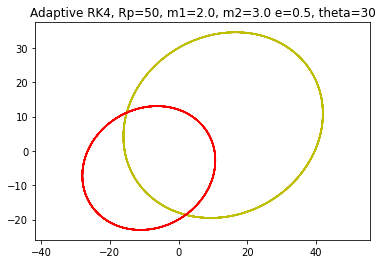

In [23]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor0,t,1),ellipsefns.getytheory(theta0,ecc0,semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor1,t,-1),ellipsefns.getytheory(theta0,ecc0,semimajor1,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5